<a href="https://colab.research.google.com/github/PranavSingh31/Sentiment-Analysis-on-Comedians/blob/main/NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Part 1

`Data cleaning is a time consuming and unenjoyable task, yet it's a very important one. Keep in mind, "garbage in, garbage out".`

#### Feeding dirty data into a model will give us results that are meaningless.

### Objective:

1. Getting the data 
2. Cleaning the data 
3. Organizing the data - organize the cleaned data into a way that is easy to input into other algorithms

### Output :
#### cleaned and organized data in two standard text formats:

1. Corpus - a collection of text
2. Document-Term Matrix - word counts in matrix format

## Problem Statement

Look at transcripts of various comedians and note their similarities and differences and find if the stand up comedian of your choice has comedy style different than other comedian.


## Getting The Data

You can get the transcripts of some comedian from [Scraps From The Loft](http://scrapsfromtheloft.com). 

You can take help of IMDB and select only 10 or 20 comedian having highest rating.






### For example:

In [ ]:
# Web scraping, pickle imports
import requests
from bs4 import BeautifulSoup
import pickle

# Scrapes transcript data from scrapsfromtheloft.com
def url_to_transcript(url):
    '''Returns transcript data specifically from scrapsfromtheloft.com.'''
    page = requests.get(url).text
    soup = BeautifulSoup(page, "lxml")
    text = [p.text for p in soup.find(class_="ast-container").find_all('p')]
    print(url)
    return text

# URLs of transcripts in scope
urls = ['https://scrapsfromtheloft.com/comedy/dave-chappelle-whats-in-a-name-transcript/',
        'https://scrapsfromtheloft.com/comedy/gabriel-iglesias-stadium-fluffy-transcript/',
        'https://scrapsfromtheloft.com/comedy/norm-macdonald-nothing-special-transcript/',
        'https://scrapsfromtheloft.com/comedy/vir-das-outside-in-the-lockdown-special-transcript/',
        'https://scrapsfromtheloft.com/comedy/stewart-lee-carpet-remnant-world-transcript/',
        'https://scrapsfromtheloft.com/comedy/george-carlin-doin-it-again-transcript/',
        'https://scrapsfromtheloft.com/comedy/michael-mcintyre-showman-transcript/',
        'https://scrapsfromtheloft.com/comedy/tom-papa-youre-doing-great-transcript/',
        'https://scrapsfromtheloft.com/comedy/taylor-tomlinson-quarter-life-crisis-transcript/',
        'https://scrapsfromtheloft.com/comedy/fortune-feimster-good-fortune-transcript/',
        'https://scrapsfromtheloft.com/comedy/ricky-gervais-supernature-transcript/',
        'https://scrapsfromtheloft.com/comedy/louis-c-k-sorry-transcript/']

# Comedian names
comedians = ['dave', 'fluffy', 'norm', 'vir', 'stewart', 'carlin', 'mcintyre', 'papa', 'taylor', 'fortune', 'ricky', 'louis']

In [ ]:
# # Actually request transcripts (takes a few minutes to run)
transcripts = [url_to_transcript(u) for u in urls]

https://scrapsfromtheloft.com/comedy/dave-chappelle-whats-in-a-name-transcript/
https://scrapsfromtheloft.com/comedy/gabriel-iglesias-stadium-fluffy-transcript/
https://scrapsfromtheloft.com/comedy/norm-macdonald-nothing-special-transcript/
https://scrapsfromtheloft.com/comedy/vir-das-outside-in-the-lockdown-special-transcript/
https://scrapsfromtheloft.com/comedy/stewart-lee-carpet-remnant-world-transcript/
https://scrapsfromtheloft.com/comedy/george-carlin-doin-it-again-transcript/
https://scrapsfromtheloft.com/comedy/michael-mcintyre-showman-transcript/
https://scrapsfromtheloft.com/comedy/tom-papa-youre-doing-great-transcript/
https://scrapsfromtheloft.com/comedy/taylor-tomlinson-quarter-life-crisis-transcript/
https://scrapsfromtheloft.com/comedy/fortune-feimster-good-fortune-transcript/
https://scrapsfromtheloft.com/comedy/ricky-gervais-supernature-transcript/
https://scrapsfromtheloft.com/comedy/louis-c-k-sorry-transcript/


In [ ]:
# Pickle files for later use

# Make a new directory to hold the text files
!mkdir transcripts

for i, c in enumerate(comedians):
    with open("transcripts/" + c + ".txt", "wb") as file:
        pickle.dump(transcripts[i], file)

mkdir: cannot create directory ‘transcripts’: File exists


In [ ]:
# Load pickled files
data = {}
for i, c in enumerate(comedians):
    with open("transcripts/" + c + ".txt", "rb") as file:
        data[c] = pickle.load(file)

In [ ]:
# Double check to make sure data has been loaded properly
data.keys()

dict_keys(['dave', 'fluffy', 'norm', 'vir', 'stewart', 'carlin', 'mcintyre', 'papa', 'taylor', 'fortune', 'ricky', 'louis'])

In [ ]:
# More checks
data['vir'][:2]

['[soft piano music playing]',
 '[Vir Das] What you’re about to watch wasn’t supposed to happen. It’s completely unscripted. It was totally unplanned. It’s just… a moment in time. When the world shut down, we decided to do 30 shows for charity, just to raise money for COVID relief. And every night, I’d ask people the same question. What’s the first thing you’re gonna do, the first thing, when this world reopens? Welcome to lockdown day. I don’t know what day it is. That’s the thing about the entire world going through the same thing at the same time. I guess it’s special. All right. What’s up! What’s up, everyone? Hello! Good evening, and welcome to what promises to be the strangest stand-up comedy gig that you and I have both ever been a part of. If you’re not using earphones, what I ask is that you get as close to the device as you possibly can so that I can hear you laugh. Because if I cannot hear you laugh, then it’s just me in a room talking to myself, worried that I’m going to di

## Cleaning The Data

When dealing with numerical data, data cleaning often involves removing null values and duplicate data, dealing with outliers, etc. With text data, there are some common data cleaning techniques, which are also known as text pre-processing techniques.

With text data, this cleaning process can go on forever. There's always an exception to every cleaning step. So, we're going to follow the MVP (minimum viable product) approach - start simple and iterate.
### Assignment:
1. Perform the following data cleaning on transcripts:
i) Make text all lower case
ii) Remove punctuation
iii) Remove numerical values
iv) Remove common non-sensical text (/n)
v) Tokenize text
vi) Remove stop words

In [ ]:
# Let's take a look at our data again
next(iter(data.keys()))

'dave'

In [ ]:
# Notice that our dictionary is currently in key: comedian, value: list of text format
next(iter(data.values()))

['What’s in a Name? is a 40-minute talk Chappelle delivered at Duke Ellington School of the Arts in Washington, D.C., on June 20, 2022',
 '* * *',
 'Art is dangerous.\nIt is one of the attractions: when it ceases to be dangerous you don’t want it.',
 'Duke Ellington',
 'Amid the controversy of Dave Chappelle’s Netflix release “The Closer,” Duke Ellington School of the Arts resolved to name its newly renovated theatre “Dave Chappelle Theatre.”\nThe following is Dave’s acceptance speech for that honor…',
 '[Dave Chappelle] This… is… surreal.',
 '[cheering and applause]',
 'In 1987… 1987, I moved back… from Ohio to D.C. And– and– and enrolled in Eastern High School, and did…',
 '[audience member] Whoo!',
 'You must not have went there when I went there, champ. Those were tough times is the way I remember it. [chuckles] [groans]',
 'When I had gone, I– I had lived with my father for three years. I went to middle school in Ohio, and when I’d gotten back to Washington, the crack epidemic was

In [ ]:
# We are going to change this to key: comedian, value: string format
def combine_text(list_of_text):
    '''Takes a list of text and combines them into one large chunk of text.'''
    combined_text = ' '.join(list_of_text)
    return combined_text

In [ ]:
# Combine it!
data_combined = {key: [combine_text(value)] for (key, value) in data.items()}

In [ ]:
# We can either keep it in dictionary format or put it into a pandas dataframe
import pandas as pd
pd.set_option('max_colwidth',190)

data_df = pd.DataFrame.from_dict(data_combined).transpose()
data_df.columns = ['transcript']
data_df = data_df.sort_index()
data_df

,transcript
carlin,"Recorded on January 12–13, 1990, State Theatre, New Brunswick, New Jersey So you want to talk about it? Oh yeah. It all started in 1977. I mean, that’s when I started doing it regularly...."
dave,"What’s in a Name? is a 40-minute talk Chappelle delivered at Duke Ellington School of the Arts in Washington, D.C., on June 20, 2022 * * * Art is dangerous.\nIt is one of the attractions..."
fluffy,"[man] Can you please state your name? Martin Moreno. But you might know me as… Martinnnnn! I’ve been touring with Gabriel Iglesias for 20-plus years. Martinnnnn! And, yeah, he’s been scr..."
fortune,[upbeat music plays] [audience cheering] [announcer] Please welcome Fortune Feimster! ♪ I’m a powerful woman ♪ ♪ Always get what I want ♪ ♪ So don’t you get in my way now That’s not what...
louis,"Recorded at the Madison Square Garden on August 14, 2021 * * * ♪♪ [“Like a Rolling Stone” by Bob Dylan playing] ♪♪ ♪ Once upon a time you dressed so fine ♪\n♪ Threw the bums a dime in yo..."
mcintyre,"Released on September 15, 2020 [Netflix] Ladies and gentlemen, please welcome to the stage Michael McIntyre! Bravo! Good evening, ladies and gentlemen! Welcome… …to my Netflix special! L..."
norm,"Norm was working hard preparing material for his Netflix special – until COVID shut things down. In the summer of 2020, he was scheduled to undergo a procedure and as he put it, “didn’t ..."
papa,"[applause, whooping] [presenter] Ladies and gentlemen, Tom Papa. [mouths] [whistling and cheering] [mouths] Thank you. Thank you. Thank you. Look at you. Look at you. New Jersey. [cheeri..."
ricky,"[audience cheering and applauding] [announcer] Good evening, ladies and gentlemen. Please welcome to the stage a man who really doesn’t need to do this. [audience laughing] Ricky Gervais..."
stewart,"(’70s GERMAN ROCK MUSIC PLAYING) ANNOUNCER: Ladies and gentlemen, it’s time to enter the Carpet Remnant World of Stewart Lee! (AUDIENCE APPLAUDING) That was a bit heavy metal, rock and r..."


In [ ]:
# Let's take a look at the transcript for Vir Das
data_df.transcript.loc['vir']

'[soft piano music playing] [Vir Das] What you’re about to watch wasn’t supposed to happen. It’s completely unscripted. It was totally unplanned. It’s just… a moment in time. When the world shut down, we decided to do 30 shows for charity, just to raise money for COVID relief. And every night, I’d ask people the same question. What’s the first thing you’re gonna do, the first thing, when this world reopens? Welcome to lockdown day. I don’t know what day it is. That’s the thing about the entire world going through the same thing at the same time. I guess it’s special. All right. What’s up! What’s up, everyone? Hello! Good evening, and welcome to what promises to be the strangest stand-up comedy gig that you and I have both ever been a part of. If you’re not using earphones, what I ask is that you get as close to the device as you possibly can so that I can hear you laugh. Because if I cannot hear you laugh, then it’s just me in a room talking to myself, worried that I’m going to die. We

In [ ]:
# Apply a first round of text cleaning techniques
import re
import string

def clean_text_round1(text):
    '''Make text lowercase, remove text in square brackets, remove punctuation and remove words containing numbers.'''
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

round1 = lambda x: clean_text_round1(x)

In [ ]:
# Let's take a look at the updated text
data_clean = pd.DataFrame(data_df.transcript.apply(round1))
data_clean

,transcript
carlin,recorded on january – state theatre new brunswick new jersey so you want to talk about it oh yeah it all started in i mean that’s when i started doing it regularly how many times have ...
dave,what’s in a name is a talk chappelle delivered at duke ellington school of the arts in washington dc on june art is dangerous\nit is one of the attractions when it ceases to be dan...
fluffy,can you please state your name martin moreno but you might know me as… martinnnnn i’ve been touring with gabriel iglesias for years martinnnnn and yeah he’s been screaming my name for ...
fortune,please welcome fortune feimster ♪ i’m a powerful woman ♪ ♪ always get what i want ♪ ♪ so don’t you get in my way now that’s not what i want ♪ ♪ ‘cause i’m a powerful woman ♪ ♪ always ...
louis,recorded at the madison square garden on august ♪♪ ♪♪ ♪ once upon a time you dressed so fine ♪\n♪ threw the bums a dime in your prime ♪\n♪ didn’t you ♪ ♪♪ ♪ people call say beware ...
mcintyre,released on september ladies and gentlemen please welcome to the stage michael mcintyre bravo good evening ladies and gentlemen welcome… …to my netflix special let’s do this thank you...
norm,norm was working hard preparing material for his netflix special – until covid shut things down in the summer of he was scheduled to undergo a procedure and as he put it “didn’t want to...
papa,ladies and gentlemen tom papa thank you thank you thank you look at you look at you new jersey yeah that’s why i’m here it’s the people it’s definitely not the weather it’s the peo...
ricky,good evening ladies and gentlemen please welcome to the stage a man who really doesn’t need to do this ricky gervais hello hello thank you shush thank you very much shush no shus...
stewart,’ german rock music playing announcer ladies and gentlemen it’s time to enter the carpet remnant world of stewart lee audience applauding that was a bit heavy metal rock and roll that ca...


In [ ]:
# Apply a second round of cleaning
def clean_text_round2(text):
    '''Get rid of some additional punctuation and non-sensical text that was missed the first time around.'''
    text = re.sub('[‘’“”…♪–]', '', text)
    text = re.sub('\n', '', text)
    return text

round2 = lambda x: clean_text_round2(x)

In [ ]:
# Let's take a look at the updated text
data_clean = pd.DataFrame(data_clean.transcript.apply(round2))
data_clean

,transcript
carlin,recorded on january state theatre new brunswick new jersey so you want to talk about it oh yeah it all started in i mean thats when i started doing it regularly how many times have yo...
dave,whats in a name is a talk chappelle delivered at duke ellington school of the arts in washington dc on june art is dangerousit is one of the attractions when it ceases to be danger...
fluffy,can you please state your name martin moreno but you might know me as martinnnnn ive been touring with gabriel iglesias for years martinnnnn and yeah hes been screaming my name for ye...
fortune,please welcome fortune feimster im a powerful woman always get what i want so dont you get in my way now thats not what i want cause im a powerful woman always get what i wan...
louis,recorded at the madison square garden on august once upon a time you dressed so fine threw the bums a dime in your prime didnt you people call say beware doll youre bound ...
mcintyre,released on september ladies and gentlemen please welcome to the stage michael mcintyre bravo good evening ladies and gentlemen welcome to my netflix special lets do this thank you if...
norm,norm was working hard preparing material for his netflix special until covid shut things down in the summer of he was scheduled to undergo a procedure and as he put it didnt want to le...
papa,ladies and gentlemen tom papa thank you thank you thank you look at you look at you new jersey yeah thats why im here its the people its definitely not the weather its the people t...
ricky,good evening ladies and gentlemen please welcome to the stage a man who really doesnt need to do this ricky gervais hello hello thank you shush thank you very much shush no shush...
stewart,german rock music playing announcer ladies and gentlemen its time to enter the carpet remnant world of stewart lee audience applauding that was a bit heavy metal rock and roll that can ...


## Organizing The Data

### Assignment:
1. Organized data in two standard text formats:
   a) Corpus - corpus is a collection of texts, and they are all put together neatly in a pandas dataframe here.
   b) Document-Term Matrix - word counts in matrix format

### Corpus: Example

A corpus is a collection of texts, and they are all put together neatly in a pandas dataframe here.

In [ ]:
# Let's take a look at our dataframe
data_df

,transcript
carlin,"Recorded on January 12–13, 1990, State Theatre, New Brunswick, New Jersey So you want to talk about it? Oh yeah. It all started in 1977. I mean, that’s when I started doing it regularly...."
dave,"What’s in a Name? is a 40-minute talk Chappelle delivered at Duke Ellington School of the Arts in Washington, D.C., on June 20, 2022 * * * Art is dangerous.\nIt is one of the attractions..."
fluffy,"[man] Can you please state your name? Martin Moreno. But you might know me as… Martinnnnn! I’ve been touring with Gabriel Iglesias for 20-plus years. Martinnnnn! And, yeah, he’s been scr..."
fortune,[upbeat music plays] [audience cheering] [announcer] Please welcome Fortune Feimster! ♪ I’m a powerful woman ♪ ♪ Always get what I want ♪ ♪ So don’t you get in my way now That’s not what...
louis,"Recorded at the Madison Square Garden on August 14, 2021 * * * ♪♪ [“Like a Rolling Stone” by Bob Dylan playing] ♪♪ ♪ Once upon a time you dressed so fine ♪\n♪ Threw the bums a dime in yo..."
mcintyre,"Released on September 15, 2020 [Netflix] Ladies and gentlemen, please welcome to the stage Michael McIntyre! Bravo! Good evening, ladies and gentlemen! Welcome… …to my Netflix special! L..."
norm,"Norm was working hard preparing material for his Netflix special – until COVID shut things down. In the summer of 2020, he was scheduled to undergo a procedure and as he put it, “didn’t ..."
papa,"[applause, whooping] [presenter] Ladies and gentlemen, Tom Papa. [mouths] [whistling and cheering] [mouths] Thank you. Thank you. Thank you. Look at you. Look at you. New Jersey. [cheeri..."
ricky,"[audience cheering and applauding] [announcer] Good evening, ladies and gentlemen. Please welcome to the stage a man who really doesn’t need to do this. [audience laughing] Ricky Gervais..."
stewart,"(’70s GERMAN ROCK MUSIC PLAYING) ANNOUNCER: Ladies and gentlemen, it’s time to enter the Carpet Remnant World of Stewart Lee! (AUDIENCE APPLAUDING) That was a bit heavy metal, rock and r..."


In [ ]:
# Let's add the comedians' full names as well
full_names = ['George Carlin ', 'Dave Chappelle', 'Gabriel Iglesias', 'Fortune Feimster', 'Louis C.K.', 'Micheal Mcintyre',
              'Norm Macdonald', 'Tom Papa', 'Ricky Gervais', 'Stewart Lee', 'Taylor Tomlinson', 'Vir Das']

data_df['full_name'] = full_names
data_df

,transcript,full_name
carlin,"Recorded on January 12–13, 1990, State Theatre, New Brunswick, New Jersey So you want to talk about it? Oh yeah. It all started in 1977. I mean, that’s when I started doing it regularly....",George Carlin
dave,"What’s in a Name? is a 40-minute talk Chappelle delivered at Duke Ellington School of the Arts in Washington, D.C., on June 20, 2022 * * * Art is dangerous.\nIt is one of the attractions...",Dave Chappelle
fluffy,"[man] Can you please state your name? Martin Moreno. But you might know me as… Martinnnnn! I’ve been touring with Gabriel Iglesias for 20-plus years. Martinnnnn! And, yeah, he’s been scr...",Gabriel Iglesias
fortune,[upbeat music plays] [audience cheering] [announcer] Please welcome Fortune Feimster! ♪ I’m a powerful woman ♪ ♪ Always get what I want ♪ ♪ So don’t you get in my way now That’s not what...,Fortune Feimster
louis,"Recorded at the Madison Square Garden on August 14, 2021 * * * ♪♪ [“Like a Rolling Stone” by Bob Dylan playing] ♪♪ ♪ Once upon a time you dressed so fine ♪\n♪ Threw the bums a dime in yo...",Louis C.K.
mcintyre,"Released on September 15, 2020 [Netflix] Ladies and gentlemen, please welcome to the stage Michael McIntyre! Bravo! Good evening, ladies and gentlemen! Welcome… …to my Netflix special! L...",Micheal Mcintyre
norm,"Norm was working hard preparing material for his Netflix special – until COVID shut things down. In the summer of 2020, he was scheduled to undergo a procedure and as he put it, “didn’t ...",Norm Macdonald
papa,"[applause, whooping] [presenter] Ladies and gentlemen, Tom Papa. [mouths] [whistling and cheering] [mouths] Thank you. Thank you. Thank you. Look at you. Look at you. New Jersey. [cheeri...",Tom Papa
ricky,"[audience cheering and applauding] [announcer] Good evening, ladies and gentlemen. Please welcome to the stage a man who really doesn’t need to do this. [audience laughing] Ricky Gervais...",Ricky Gervais
stewart,"(’70s GERMAN ROCK MUSIC PLAYING) ANNOUNCER: Ladies and gentlemen, it’s time to enter the Carpet Remnant World of Stewart Lee! (AUDIENCE APPLAUDING) That was a bit heavy metal, rock and r...",Stewart Lee


In [ ]:
# Let's pickle it for later use
data_df.to_pickle("corpus.pkl")

### Document-Term Matrix: Example

For many of the techniques we'll be using in future assignment, the text must be tokenized, meaning broken down into smaller pieces. The most common tokenization technique is to break down text into words. We can do this using scikit-learn's ` CountVectorizer `, where every row will represent a different document and every column will represent a different word.

In addition, with ` CountVectorizer `, we can remove stop words. Stop words are common words that add no additional meaning to text such as 'a', 'the', etc.

In [ ]:
# We are going to create a document-term matrix using CountVectorizer, and exclude common English stop words
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(stop_words='english')
data_cv = cv.fit_transform(data_clean.transcript)
data_dtm = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names())
data_dtm.index = data_clean.index
data_dtm

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,aaah,aah,abc,abducted,abducting,abernathy,abernathys,abilities,able,abled,...,zombies,zone,zones,zoo,zoom,zoomed,zucchinis,álvarez,ándale,ñañaras
carlin,0,0,0,0,0,0,0,0,2,2,...,0,0,0,0,0,0,0,0,0,0
dave,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
fluffy,1,0,1,0,0,0,0,0,0,0,...,0,0,1,0,4,0,0,3,1,1
fortune,0,0,0,0,0,0,0,0,2,0,...,0,0,0,0,1,1,0,0,0,0
louis,0,0,0,0,0,0,0,0,1,0,...,0,0,0,9,0,0,0,0,0,0
mcintyre,0,2,0,0,0,0,0,0,0,0,...,0,2,0,0,0,0,0,0,0,0
norm,0,0,0,0,0,2,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
papa,1,0,0,0,0,0,0,0,2,0,...,0,0,0,1,0,0,0,0,0,0
ricky,0,0,0,0,1,0,0,0,2,0,...,0,0,0,0,0,0,0,0,0,0
stewart,0,0,0,0,0,0,0,0,3,0,...,8,0,0,0,0,0,0,0,0,0


In [ ]:
# Let's pickle it for later use
data_dtm.to_pickle("dtm.pkl")

In [ ]:
# Let's also pickle the cleaned data (before we put it in document-term matrix format) and the CountVectorizer object
data_clean.to_pickle('data_clean.pkl')
pickle.dump(cv, open("cv.pkl", "wb"))

## Additional Assignments:

1. Can you add an additional regular expression to the clean_text_round2 function to further clean the text?
2. Play around with CountVectorizer's parameters. What is ngram_range? What is min_df and max_df?

1. On clear inspection of transcripts after first round of cleaning, we can see we can clearly music symbol (♪) and hypen (-) in the transcript of some comedians which is also not necessary for your processing, Therefore I've added it to re.sub function's regular expression. After second round of cleaning, it is removed and transcript is not more workable.

2. CountVectorizer has many parameters such as encoding, strip_accent, stop_words, token_pattern, ngram_range ...... etc. More could be found on https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html official documentation for same

# Part 2

After the data cleaning step where we put our data into a few standard formats, the next step is to take a look at the data and see if what we're looking at makes sense. Before applying any fancy algorithms, it's always important to explore the data first.

When working with numerical data, some of the exploratory data analysis (EDA) techniques we can use include finding the average of the data set, the distribution of the data, the most common values, etc. The idea is the same when working with text data. We are going to find some more obvious patterns with EDA before identifying the hidden patterns with machines learning (ML) techniques. We are going to look at the following for each comedian:

1. **Most common words** - find these and create word clouds
2. **Size of vocabulary** - look number of unique words and also how quickly someone speaks
3. **Amount of profanity** - most common terms

## Most Common Words

### Analysis

In [ ]:
# Read in the document-term matrix
import pandas as pd

data = pd.read_pickle('dtm.pkl')
data = data.transpose()
data.head()

,carlin,dave,fluffy,fortune,louis,mcintyre,norm,papa,ricky,stewart,taylor,vir
aaah,0,0,1,0,0,0,0,1,0,0,0,0
aah,0,0,0,0,0,2,0,0,0,0,0,0
abc,0,0,1,0,0,0,0,0,0,0,0,0
abducted,0,0,0,0,0,0,0,0,0,0,1,0
abducting,0,0,0,0,0,0,0,0,1,0,0,0


In [ ]:
# Find the top 30 words said by each comedian
top_dict = {}
for c in data.columns:
    top = data[c].sort_values(ascending=False).head(30)
    top_dict[c]= list(zip(top.index, top.values))

top_dict

{'carlin': [('dont', 57),
  ('say', 52),
  ('like', 51),
  ('know', 48),
  ('people', 43),
  ('got', 42),
  ('little', 41),
  ('im', 39),
  ('thats', 38),
  ('want', 33),
  ('theyre', 32),
  ('think', 32),
  ('dog', 30),
  ('things', 29),
  ('lot', 26),
  ('good', 24),
  ('shit', 23),
  ('right', 20),
  ('just', 20),
  ('going', 19),
  ('ought', 18),
  ('youre', 18),
  ('thing', 18),
  ('fucking', 18),
  ('theres', 18),
  ('hear', 17),
  ('god', 16),
  ('life', 16),
  ('heres', 16),
  ('language', 16)],
 'dave': [('said', 61),
  ('like', 44),
  ('didnt', 30),
  ('know', 29),
  ('school', 29),
  ('just', 28),
  ('time', 22),
  ('im', 21),
  ('kids', 20),
  ('went', 20),
  ('did', 19),
  ('say', 18),
  ('got', 17),
  ('day', 16),
  ('thats', 15),
  ('night', 14),
  ('ellington', 13),
  ('remember', 13),
  ('work', 13),
  ('tell', 13),
  ('dont', 13),
  ('came', 13),
  ('theater', 13),
  ('wanna', 12),
  ('told', 12),
  ('man', 11),
  ('good', 11),
  ('id', 10),
  ('chappelle', 10),
  ('w

In [ ]:
# Print the top 15 words said by each comedian
for comedian, top_words in top_dict.items():
    print(comedian)
    print(', '.join([word for word, count in top_words[0:30]]))
    print('---')

carlin
dont, say, like, know, people, got, little, im, thats, want, theyre, think, dog, things, lot, good, shit, right, just, going, ought, youre, thing, fucking, theres, hear, god, life, heres, language
---
dave
said, like, didnt, know, school, just, time, im, kids, went, did, say, got, day, thats, night, ellington, remember, work, tell, dont, came, theater, wanna, told, man, good, id, chappelle, way
---
fluffy
like, im, know, said, just, dont, youre, thats, right, going, got, okay, oh, yeah, hes, gonna, people, tell, look, want, thank, time, cause, thing, say, did, little, make, good, guys
---
fortune
like, im, just, got, said, dont, know, did, good, jax, right, oh, thats, uh, think, look, want, cause, going, start, yeah, gonna, room, theyre, went, people, car, goes, lot, picture
---
louis
like, just, im, dont, know, thats, people, theyre, going, fucking, got, way, want, youre, good, really, think, theres, fuck, right, thing, guy, hes, shit, things, gay, cause, shes, okay, look
---
m

**NOTE:** At this point, we could go on and create word clouds. However, by looking at these top words, you can see that some of them have very little meaning and could be added to a stop words list, so let's do just that.



In [ ]:
# Look at the most common top words --> add them to the stop word list
from collections import Counter

# Let's first pull out the top 30 words for each comedian
words = []
for comedian in data.columns:
    top = [word for (word, count) in top_dict[comedian]]
    for t in top:
        words.append(t)
        
words

['dont',
 'say',
 'like',
 'know',
 'people',
 'got',
 'little',
 'im',
 'thats',
 'want',
 'theyre',
 'think',
 'dog',
 'things',
 'lot',
 'good',
 'shit',
 'right',
 'just',
 'going',
 'ought',
 'youre',
 'thing',
 'fucking',
 'theres',
 'hear',
 'god',
 'life',
 'heres',
 'language',
 'said',
 'like',
 'didnt',
 'know',
 'school',
 'just',
 'time',
 'im',
 'kids',
 'went',
 'did',
 'say',
 'got',
 'day',
 'thats',
 'night',
 'ellington',
 'remember',
 'work',
 'tell',
 'dont',
 'came',
 'theater',
 'wanna',
 'told',
 'man',
 'good',
 'id',
 'chappelle',
 'way',
 'like',
 'im',
 'know',
 'said',
 'just',
 'dont',
 'youre',
 'thats',
 'right',
 'going',
 'got',
 'okay',
 'oh',
 'yeah',
 'hes',
 'gonna',
 'people',
 'tell',
 'look',
 'want',
 'thank',
 'time',
 'cause',
 'thing',
 'say',
 'did',
 'little',
 'make',
 'good',
 'guys',
 'like',
 'im',
 'just',
 'got',
 'said',
 'dont',
 'know',
 'did',
 'good',
 'jax',
 'right',
 'oh',
 'thats',
 'uh',
 'think',
 'look',
 'want',
 'cause'

In [ ]:
# Let's aggregate this list and identify the most common words along with how many routines they occur in
Counter(words).most_common()

[('dont', 12),
 ('like', 12),
 ('know', 12),
 ('got', 12),
 ('im', 12),
 ('thats', 12),
 ('just', 12),
 ('people', 11),
 ('right', 11),
 ('think', 10),
 ('youre', 10),
 ('good', 9),
 ('going', 9),
 ('oh', 8),
 ('yeah', 8),
 ('time', 7),
 ('want', 6),
 ('theyre', 6),
 ('thing', 6),
 ('said', 6),
 ('did', 6),
 ('hes', 6),
 ('look', 6),
 ('say', 5),
 ('little', 5),
 ('theres', 5),
 ('didnt', 5),
 ('went', 5),
 ('cause', 5),
 ('really', 5),
 ('way', 4),
 ('okay', 4),
 ('ive', 4),
 ('shit', 3),
 ('fucking', 3),
 ('day', 3),
 ('tell', 3),
 ('gonna', 3),
 ('shes', 3),
 ('come', 3),
 ('ill', 3),
 ('dog', 2),
 ('things', 2),
 ('lot', 2),
 ('life', 2),
 ('night', 2),
 ('remember', 2),
 ('work', 2),
 ('id', 2),
 ('make', 2),
 ('guys', 2),
 ('uh', 2),
 ('goes', 2),
 ('guy', 2),
 ('love', 2),
 ('um', 2),
 ('bit', 2),
 ('mean', 2),
 ('need', 2),
 ('great', 2),
 ('ought', 1),
 ('hear', 1),
 ('god', 1),
 ('heres', 1),
 ('language', 1),
 ('school', 1),
 ('kids', 1),
 ('ellington', 1),
 ('came', 1),
 ('

In [ ]:
# If more than half of the comedians have it as a top word, exclude it from the list
add_stop_words = [word for word, count in Counter(words).most_common() if count > 4]
add_stop_words

['dont',
 'like',
 'know',
 'got',
 'im',
 'thats',
 'just',
 'people',
 'right',
 'think',
 'youre',
 'good',
 'going',
 'oh',
 'yeah',
 'time',
 'want',
 'theyre',
 'thing',
 'said',
 'did',
 'hes',
 'look',
 'say',
 'little',
 'theres',
 'didnt',
 'went',
 'cause',
 'really']

In [ ]:
# Let's update our document-term matrix with the new list of stop words
from sklearn.feature_extraction import text 
from sklearn.feature_extraction.text import CountVectorizer

# Read in cleaned data
data_clean = pd.read_pickle('data_clean.pkl')

# Add new stop words
stop_words = text.ENGLISH_STOP_WORDS.union(add_stop_words)

# Recreate document-term matrix
cv = CountVectorizer(stop_words=stop_words)
data_cv = cv.fit_transform(data_clean.transcript)
data_stop = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names())
data_stop.index = data_clean.index

# Pickle it for later use
import pickle
pickle.dump(cv, open("cv_stop.pkl", "wb"))
data_stop.to_pickle("dtm_stop.pkl")

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
# Let's make some word clouds!
# Terminal / Anaconda Prompt: conda install -c conda-forge wordcloud
from wordcloud import WordCloud

wc = WordCloud(stopwords=stop_words, background_color="white", colormap="Dark2",
               max_font_size=150, random_state=42)

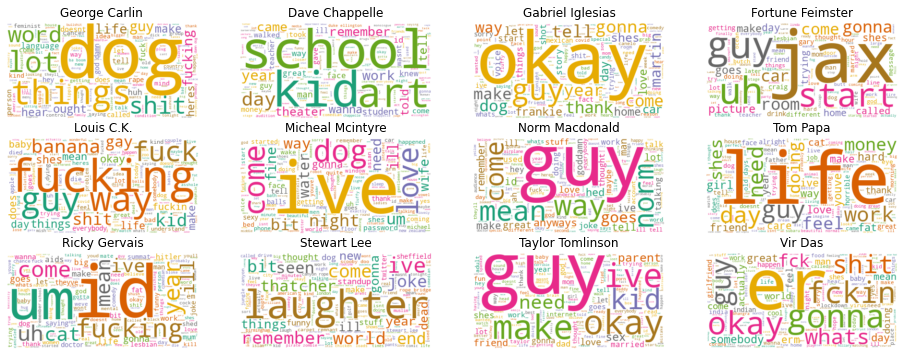

In [ ]:
# Reset the output dimensions
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [16, 6]

full_names = ['George Carlin ', 'Dave Chappelle', 'Gabriel Iglesias', 'Fortune Feimster', 'Louis C.K.', 'Micheal Mcintyre',
              'Norm Macdonald', 'Tom Papa', 'Ricky Gervais', 'Stewart Lee', 'Taylor Tomlinson', 'Vir Das']

# Create subplots for each comedian
for index, comedian in enumerate(data.columns):
    wc.generate(data_clean.transcript[comedian])
    
    plt.subplot(3, 4, index+1)
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title(full_names[index])
    
plt.show()

* Louis CK uses alot of explicit words like fucking, fuck, gay, banana (as a metaphor for penis) that kind of points towards his open style of comedy. 
* Fortune Feimster used word Jax most times, that is his wife Jacquelyn Smith's nickname that kinda points towards the direction that the particular routine was focussed towards his wife.
* Ricky Gervais used a lot of Gen Z words like wanna, fucking, id, um that also kind of points toward classic British comedy

## Number of Words

### Analysis

In [ ]:
# Find the number of unique words that each comedian uses

# Identify the non-zero items in the document-term matrix, meaning that the word occurs at least once
unique_list = []
for comedian in data.columns:
    uniques = data[comedian].to_numpy().nonzero()[0].size
    unique_list.append(uniques)

# Create a new dataframe that contains this unique word count
data_words = pd.DataFrame(list(zip(full_names, unique_list)), columns=['comedian', 'unique_words'])
data_unique_sort = data_words.sort_values(by='unique_words')
data_unique_sort

,comedian,unique_words
1,Dave Chappelle,991
4,Louis C.K.,1187
11,Vir Das,1259
3,Fortune Feimster,1389
7,Tom Papa,1424
10,Taylor Tomlinson,1482
5,Micheal Mcintyre,1495
8,Ricky Gervais,1519
0,George Carlin,1524
6,Norm Macdonald,1645


In [ ]:
# Calculate the words per minute of each comedian

# Find the total number of words that a comedian uses
total_list = []
for comedian in data.columns:
    totals = sum(data[comedian])
    total_list.append(totals)
    
# Comedy special run times from IMDB, in minutes
run_times = [60, 39, 115, 60, 63, 62, 86, 60, 64, 150, 61, 50]

# Let's add some columns to our dataframe
data_words['total_words'] = total_list
data_words['run_times'] = run_times
data_words['words_per_minute'] = data_words['total_words'] / data_words['run_times']

# Sort the dataframe by words per minute to see who talks the slowest and fastest
data_wpm_sort = data_words.sort_values(by='words_per_minute')
data_wpm_sort

,comedian,unique_words,total_words,run_times,words_per_minute
9,Stewart Lee,2077,7153,150,47.686667
4,Louis C.K.,1187,3676,63,58.349206
3,Fortune Feimster,1389,3531,60,58.850000
2,Gabriel Iglesias,1889,6834,115,59.426087
1,Dave Chappelle,991,2353,39,60.333333
0,George Carlin,1524,3770,60,62.833333
6,Norm Macdonald,1645,5719,86,66.500000
7,Tom Papa,1424,3995,60,66.583333
10,Taylor Tomlinson,1482,4137,61,67.819672
5,Micheal Mcintyre,1495,4257,62,68.661290


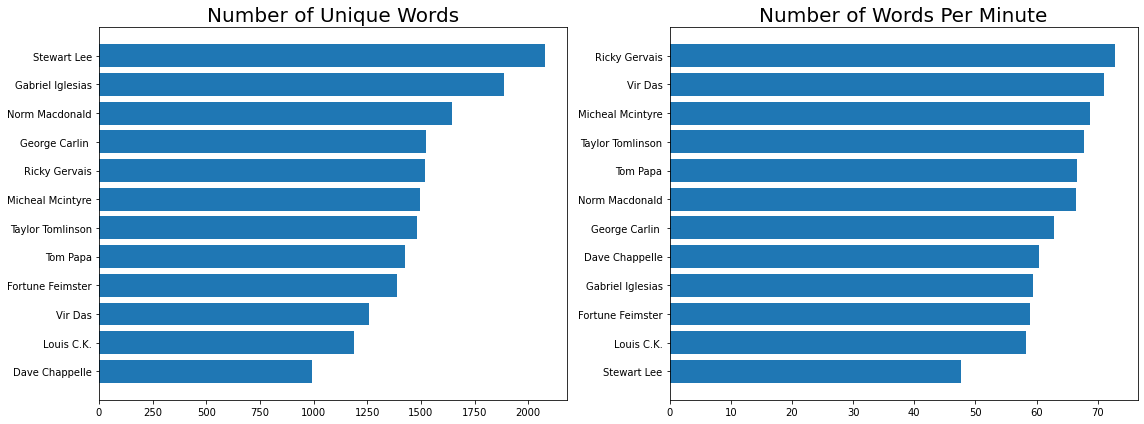

In [ ]:
# Let's plot our findings
import numpy as np

y_pos = np.arange(len(data_words))

plt.subplot(1, 2, 1)
plt.barh(y_pos, data_unique_sort.unique_words, align='center')
plt.yticks(y_pos, data_unique_sort.comedian)
plt.title('Number of Unique Words', fontsize=20)

plt.subplot(1, 2, 2)
plt.barh(y_pos, data_wpm_sort.words_per_minute, align='center')
plt.yticks(y_pos, data_wpm_sort.comedian)
plt.title('Number of Words Per Minute', fontsize=20)

plt.tight_layout()
plt.show()

### Findings

* **Vocabulary**
   * Gabriel Iglesias (Mexican/Observational comedy) and Steward Lee (Rampant British comedy) use a lot of words in their comedy
   * Louis CK (self-depricating comedy) and Dave Chappelle (storytelling comedy) have a smaller vocabulary


* **Talking Speed**
   * Ricky Gervais (Rampant British comedy) and Vir Das (Indian comedy) talk fast
   * Steward Lee (Rampant British comedy) and Louis C.K. (self-depricating comedy) talk slow
   
Tom Papa is somewhere in the middle in both cases. Nothing too interesting here.

## Amount of Profanity

### Analysis

In [ ]:
# Earlier I said we'd revisit profanity. Let's take a look at the most common words again.
Counter(words).most_common()

[('dont', 12),
 ('like', 12),
 ('know', 12),
 ('got', 12),
 ('im', 12),
 ('thats', 12),
 ('just', 12),
 ('people', 11),
 ('right', 11),
 ('think', 10),
 ('youre', 10),
 ('good', 9),
 ('going', 9),
 ('oh', 8),
 ('yeah', 8),
 ('time', 7),
 ('want', 6),
 ('theyre', 6),
 ('thing', 6),
 ('said', 6),
 ('did', 6),
 ('hes', 6),
 ('look', 6),
 ('say', 5),
 ('little', 5),
 ('theres', 5),
 ('didnt', 5),
 ('went', 5),
 ('cause', 5),
 ('really', 5),
 ('way', 4),
 ('okay', 4),
 ('ive', 4),
 ('shit', 3),
 ('fucking', 3),
 ('day', 3),
 ('tell', 3),
 ('gonna', 3),
 ('shes', 3),
 ('come', 3),
 ('ill', 3),
 ('dog', 2),
 ('things', 2),
 ('lot', 2),
 ('life', 2),
 ('night', 2),
 ('remember', 2),
 ('work', 2),
 ('id', 2),
 ('make', 2),
 ('guys', 2),
 ('uh', 2),
 ('goes', 2),
 ('guy', 2),
 ('love', 2),
 ('um', 2),
 ('bit', 2),
 ('mean', 2),
 ('need', 2),
 ('great', 2),
 ('ought', 1),
 ('hear', 1),
 ('god', 1),
 ('heres', 1),
 ('language', 1),
 ('school', 1),
 ('kids', 1),
 ('ellington', 1),
 ('came', 1),
 ('

In [ ]:
# Let's isolate just these bad words
data_bad_words = data.transpose()[['fucking', 'fuck', 'shit', 'fckin', 'fck']]
data_profanity = pd.concat([data_bad_words.fucking + data_bad_words.fuck + data_bad_words.fckin + data_bad_words.fck, data_bad_words.shit], axis=1)
data_profanity.columns = ['f_word', 's_word']
data_profanity['comedian'] = full_names
data_profanity

,f_word,s_word,comedian
carlin,33,23,George Carlin
dave,4,6,Dave Chappelle
fluffy,6,18,Gabriel Iglesias
fortune,0,4,Fortune Feimster
louis,68,19,Louis C.K.
mcintyre,12,3,Micheal Mcintyre
norm,17,5,Norm Macdonald
papa,0,3,Tom Papa
ricky,47,10,Ricky Gervais
stewart,17,2,Stewart Lee


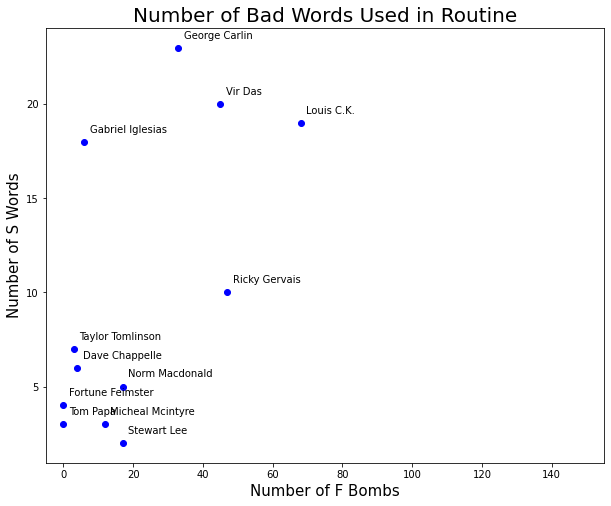

In [ ]:
# Let's create a scatter plot of our findings
plt.rcParams['figure.figsize'] = [10, 8]

for i, comedian in enumerate(data_profanity.index):
    x = data_profanity.f_word.loc[comedian]
    y = data_profanity.s_word.loc[comedian]
    plt.scatter(x, y, color='blue')
    plt.text(x+1.5, y+0.5, full_names[i], fontsize=10)
    plt.xlim(-5, 155) 
    
plt.title('Number of Bad Words Used in Routine', fontsize=20)
plt.xlabel('Number of F Bombs', fontsize=15)
plt.ylabel('Number of S Words', fontsize=15)

plt.show()

### Findings

* **Averaging 1 F-Bombs Per Minute!** - Louis CK gave 1 F-bomb per minute that points his style of comedy.
* **Clean Humor** - Tom Papa and Fortune Feimster gave no f_bombs in a 60 minute routine, where.

In [ ]:
# Let's isolate just these words
data_common_words = data.transpose()[['gay','fat']]
data_count = pd.concat([data_common_words.gay,data_common_words.fat], axis=1)
data_count.columns = ['gay','fat']
data_count

,gay,fat
carlin,0,2
dave,2,0
fluffy,0,3
fortune,2,0
louis,19,7
mcintyre,0,3
norm,0,4
papa,4,13
ricky,3,12
stewart,1,5


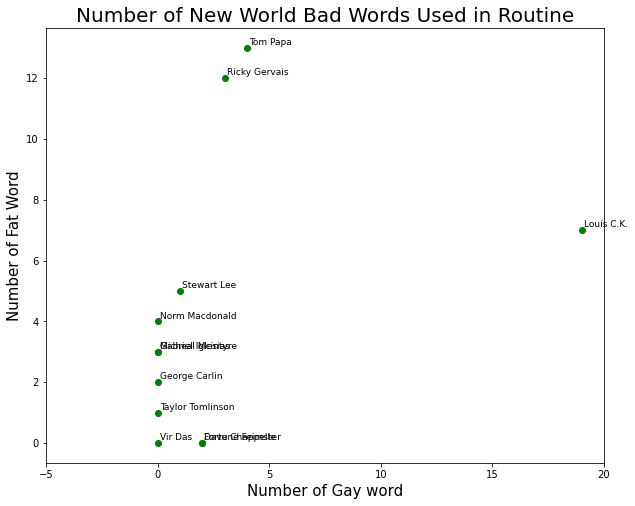

In [ ]:
plt.rcParams['figure.figsize'] = [10, 8]

for i, comedian in enumerate(data_profanity.index):
    x = data_count.gay.loc[comedian]
    y = data_count.fat.loc[comedian]
    plt.scatter(x, y, color='green')
    plt.text(x+0.1, y+0.1, full_names[i], fontsize=9)
    plt.xlim(-5, 20) 
    
plt.title('Number of New World Bad Words Used in Routine', fontsize=20)
plt.xlabel('Number of Gay word', fontsize=15)
plt.ylabel('Number of Fat Word', fontsize=15)

plt.show()

# Part 3 - Sentiment Analysis

## Introduction

So far, all of the analysis we've done has been pretty generic - looking at counts, creating scatter plots, etc. These techniques could be applied to numeric data as well.

When it comes to text data, there are a few popular techniques that we'll be going through in the next few notebooks, starting with sentiment analysis. A few key points to remember with sentiment analysis.

1. **TextBlob Module:** Linguistic researchers have labeled the sentiment of words based on their domain expertise. Sentiment of words can vary based on where it is in a sentence. The TextBlob module allows us to take advantage of these labels.
2. **Sentiment Labels:** Each word in a corpus is labeled in terms of polarity and subjectivity (there are more labels as well, but we're going to ignore them for now). A corpus' sentiment is the average of these.
   * **Polarity**: How positive or negative a word is. -1 is very negative. +1 is very positive.
   * **Subjectivity**: How subjective, or opinionated a word is. 0 is fact. +1 is very much an opinion.

For more info on how TextBlob coded up its [sentiment function](https://planspace.org/20150607-textblob_sentiment/).

Let's take a look at the sentiment of the various transcripts, both overall and throughout the comedy routine.

## Sentiment of Routine

In [ ]:
# We'll start by reading in the corpus, which preserves word order
import pandas as pd

data = pd.read_pickle('corpus.pkl')
data

,transcript,full_name
carlin,"Recorded on January 12–13, 1990, State Theatre, New Brunswick, New Jersey So you want to talk about it? Oh yeah. It all started in 1977. I mean, that’s when I started doing it regularly....",George Carlin
dave,"What’s in a Name? is a 40-minute talk Chappelle delivered at Duke Ellington School of the Arts in Washington, D.C., on June 20, 2022 * * * Art is dangerous.\nIt is one of the attractions...",Dave Chappelle
fluffy,"[man] Can you please state your name? Martin Moreno. But you might know me as… Martinnnnn! I’ve been touring with Gabriel Iglesias for 20-plus years. Martinnnnn! And, yeah, he’s been scr...",Gabriel Iglesias
fortune,[upbeat music plays] [audience cheering] [announcer] Please welcome Fortune Feimster! ♪ I’m a powerful woman ♪ ♪ Always get what I want ♪ ♪ So don’t you get in my way now That’s not what...,Fortune Feimster
louis,"Recorded at the Madison Square Garden on August 14, 2021 * * * ♪♪ [“Like a Rolling Stone” by Bob Dylan playing] ♪♪ ♪ Once upon a time you dressed so fine ♪\n♪ Threw the bums a dime in yo...",Louis C.K.
mcintyre,"Released on September 15, 2020 [Netflix] Ladies and gentlemen, please welcome to the stage Michael McIntyre! Bravo! Good evening, ladies and gentlemen! Welcome… …to my Netflix special! L...",Micheal Mcintyre
norm,"Norm was working hard preparing material for his Netflix special – until COVID shut things down. In the summer of 2020, he was scheduled to undergo a procedure and as he put it, “didn’t ...",Norm Macdonald
papa,"[applause, whooping] [presenter] Ladies and gentlemen, Tom Papa. [mouths] [whistling and cheering] [mouths] Thank you. Thank you. Thank you. Look at you. Look at you. New Jersey. [cheeri...",Tom Papa
ricky,"[audience cheering and applauding] [announcer] Good evening, ladies and gentlemen. Please welcome to the stage a man who really doesn’t need to do this. [audience laughing] Ricky Gervais...",Ricky Gervais
stewart,"(’70s GERMAN ROCK MUSIC PLAYING) ANNOUNCER: Ladies and gentlemen, it’s time to enter the Carpet Remnant World of Stewart Lee! (AUDIENCE APPLAUDING) That was a bit heavy metal, rock and r...",Stewart Lee


In [ ]:
# Create quick lambda functions to find the polarity and subjectivity of each routine
# Terminal / Anaconda Navigator: conda install -c conda-forge textblob
from textblob import TextBlob

pol = lambda x: TextBlob(x).sentiment.polarity
sub = lambda x: TextBlob(x).sentiment.subjectivity

data['polarity'] = data['transcript'].apply(pol)
data['subjectivity'] = data['transcript'].apply(sub)
data

,transcript,full_name,polarity,subjectivity
carlin,"Recorded on January 12–13, 1990, State Theatre, New Brunswick, New Jersey So you want to talk about it? Oh yeah. It all started in 1977. I mean, that’s when I started doing it regularly....",George Carlin,0.038451,0.510631
dave,"What’s in a Name? is a 40-minute talk Chappelle delivered at Duke Ellington School of the Arts in Washington, D.C., on June 20, 2022 * * * Art is dangerous.\nIt is one of the attractions...",Dave Chappelle,0.148691,0.517285
fluffy,"[man] Can you please state your name? Martin Moreno. But you might know me as… Martinnnnn! I’ve been touring with Gabriel Iglesias for 20-plus years. Martinnnnn! And, yeah, he’s been scr...",Gabriel Iglesias,0.114103,0.476204
fortune,[upbeat music plays] [audience cheering] [announcer] Please welcome Fortune Feimster! ♪ I’m a powerful woman ♪ ♪ Always get what I want ♪ ♪ So don’t you get in my way now That’s not what...,Fortune Feimster,0.130376,0.493430
louis,"Recorded at the Madison Square Garden on August 14, 2021 * * * ♪♪ [“Like a Rolling Stone” by Bob Dylan playing] ♪♪ ♪ Once upon a time you dressed so fine ♪\n♪ Threw the bums a dime in yo...",Louis C.K.,0.058751,0.562946
mcintyre,"Released on September 15, 2020 [Netflix] Ladies and gentlemen, please welcome to the stage Michael McIntyre! Bravo! Good evening, ladies and gentlemen! Welcome… …to my Netflix special! L...",Micheal Mcintyre,0.118465,0.525796
norm,"Norm was working hard preparing material for his Netflix special – until COVID shut things down. In the summer of 2020, he was scheduled to undergo a procedure and as he put it, “didn’t ...",Norm Macdonald,0.119877,0.528112
papa,"[applause, whooping] [presenter] Ladies and gentlemen, Tom Papa. [mouths] [whistling and cheering] [mouths] Thank you. Thank you. Thank you. Look at you. Look at you. New Jersey. [cheeri...",Tom Papa,0.084975,0.540879
ricky,"[audience cheering and applauding] [announcer] Good evening, ladies and gentlemen. Please welcome to the stage a man who really doesn’t need to do this. [audience laughing] Ricky Gervais...",Ricky Gervais,0.077167,0.495523
stewart,"(’70s GERMAN ROCK MUSIC PLAYING) ANNOUNCER: Ladies and gentlemen, it’s time to enter the Carpet Remnant World of Stewart Lee! (AUDIENCE APPLAUDING) That was a bit heavy metal, rock and r...",Stewart Lee,0.053753,0.472333


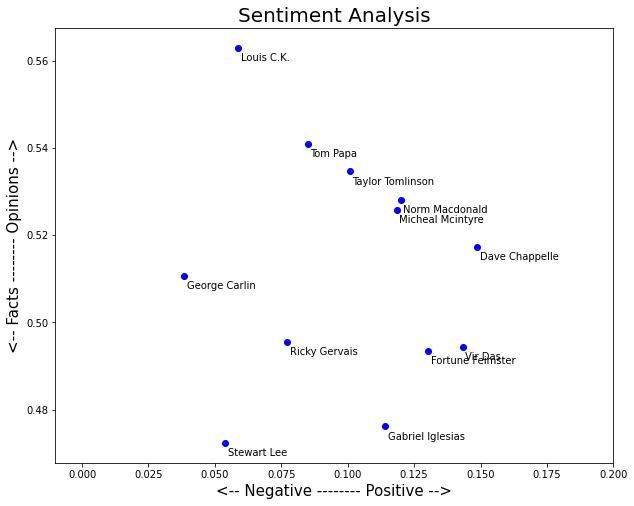

In [ ]:
# Let's plot the results
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [10, 8]

for index, comedian in enumerate(data.index):
    x = data.polarity.loc[comedian]
    y = data.subjectivity.loc[comedian]
    plt.scatter(x, y, color='blue')
    plt.text(x+.001, y-0.003, data['full_name'][index], fontsize=10)
    plt.xlim(-.01, .20) 
    
plt.title('Sentiment Analysis', fontsize=20)
plt.xlabel('<-- Negative -------- Positive -->', fontsize=15)
plt.ylabel('<-- Facts -------- Opinions -->', fontsize=15)

plt.show()

## Sentiment of Routine Over Time

Instead of looking at the overall sentiment, let's see if there's anything interesting about the sentiment over time throughout each routine.

In [ ]:
# Split each routine into 10 parts
import numpy as np
import math

def split_text_fifty(text, n=50):
    '''Takes in a string of text and splits into n equal parts, with a default of 10 equal parts.'''

    # Calculate length of text, the size of each chunk of text and the starting points of each chunk of text
    length = len(text)
    size = math.floor(length / n)
    start = np.arange(0, length, size)
    
    # Pull out equally sized pieces of text and put it into a list
    split_list = []
    for piece in range(n):
        split_list.append(text[start[piece]:start[piece]+size])
    return split_list

def split_text_ten(text, n=10):
    '''Takes in a string of text and splits into n equal parts, with a default of 10 equal parts.'''

    # Calculate length of text, the size of each chunk of text and the starting points of each chunk of text
    length = len(text)
    size = math.floor(length / n)
    start = np.arange(0, length, size)
    
    # Pull out equally sized pieces of text and put it into a list
    split_list = []
    for piece in range(n):
        split_list.append(text[start[piece]:start[piece]+size])
    return split_list

In [ ]:
# Let's take a look at our data again
data

,transcript,full_name,polarity,subjectivity
carlin,"Recorded on January 12–13, 1990, State Theatre, New Brunswick, New Jersey So you want to talk about it? Oh yeah. It all started in 1977. I mean, that’s when I started doing it regularly....",George Carlin,0.038451,0.510631
dave,"What’s in a Name? is a 40-minute talk Chappelle delivered at Duke Ellington School of the Arts in Washington, D.C., on June 20, 2022 * * * Art is dangerous.\nIt is one of the attractions...",Dave Chappelle,0.148691,0.517285
fluffy,"[man] Can you please state your name? Martin Moreno. But you might know me as… Martinnnnn! I’ve been touring with Gabriel Iglesias for 20-plus years. Martinnnnn! And, yeah, he’s been scr...",Gabriel Iglesias,0.114103,0.476204
fortune,[upbeat music plays] [audience cheering] [announcer] Please welcome Fortune Feimster! ♪ I’m a powerful woman ♪ ♪ Always get what I want ♪ ♪ So don’t you get in my way now That’s not what...,Fortune Feimster,0.130376,0.493430
louis,"Recorded at the Madison Square Garden on August 14, 2021 * * * ♪♪ [“Like a Rolling Stone” by Bob Dylan playing] ♪♪ ♪ Once upon a time you dressed so fine ♪\n♪ Threw the bums a dime in yo...",Louis C.K.,0.058751,0.562946
mcintyre,"Released on September 15, 2020 [Netflix] Ladies and gentlemen, please welcome to the stage Michael McIntyre! Bravo! Good evening, ladies and gentlemen! Welcome… …to my Netflix special! L...",Micheal Mcintyre,0.118465,0.525796
norm,"Norm was working hard preparing material for his Netflix special – until COVID shut things down. In the summer of 2020, he was scheduled to undergo a procedure and as he put it, “didn’t ...",Norm Macdonald,0.119877,0.528112
papa,"[applause, whooping] [presenter] Ladies and gentlemen, Tom Papa. [mouths] [whistling and cheering] [mouths] Thank you. Thank you. Thank you. Look at you. Look at you. New Jersey. [cheeri...",Tom Papa,0.084975,0.540879
ricky,"[audience cheering and applauding] [announcer] Good evening, ladies and gentlemen. Please welcome to the stage a man who really doesn’t need to do this. [audience laughing] Ricky Gervais...",Ricky Gervais,0.077167,0.495523
stewart,"(’70s GERMAN ROCK MUSIC PLAYING) ANNOUNCER: Ladies and gentlemen, it’s time to enter the Carpet Remnant World of Stewart Lee! (AUDIENCE APPLAUDING) That was a bit heavy metal, rock and r...",Stewart Lee,0.053753,0.472333


In [ ]:
# Let's create a list to hold all of the pieces of text
list_pieces = []
for t in data.transcript:
    split_fifty = split_text_fifty(t)
    list_pieces.append(split_fifty)
list_pieces

[['Recorded on January 12–13, 1990, State Theatre, New Brunswick, New Jersey So you want to talk about it? Oh yeah. It all started in 1977. I mean, that’s when I started doing it regularly. How many times have you done it? Six times. I’ve done it six times. Why do you do it? I don’t know. It’s like I can’t help myself. What does your family think? Thank God my family doesn’t know. But how’d you get caught? They were taping me. Taping you? Yeah. Every time I did it, they had a tape running. Jumbo shrimp, those words don’t even go together, man. That’s like military intelligence, they have that, too. How did they do that? That’s what they tell you, get on the plane, get on the plane. Fuck you, I’m getting in the plane. I wonder a lot of things, but that’s my job. My job is thinking up goofy shit. Al Sleet here, your hippie dippie weather man with all the hippie dippie weather,',
  ' man. Got into an argument with my Rice Krispies. I distinctly heard Snap, Crackle, fuck him. Have a nice d

In [ ]:
# Let's create a list to hold all of the pieces of text
list_pieces_ten = []
for t in data.transcript:
    split_ten = split_text_ten(t)
    list_pieces_ten.append(split_ten)
list_pieces_ten

[['Recorded on January 12–13, 1990, State Theatre, New Brunswick, New Jersey So you want to talk about it? Oh yeah. It all started in 1977. I mean, that’s when I started doing it regularly. How many times have you done it? Six times. I’ve done it six times. Why do you do it? I don’t know. It’s like I can’t help myself. What does your family think? Thank God my family doesn’t know. But how’d you get caught? They were taping me. Taping you? Yeah. Every time I did it, they had a tape running. Jumbo shrimp, those words don’t even go together, man. That’s like military intelligence, they have that, too. How did they do that? That’s what they tell you, get on the plane, get on the plane. Fuck you, I’m getting in the plane. I wonder a lot of things, but that’s my job. My job is thinking up goofy shit. Al Sleet here, your hippie dippie weather man with all the hippie dippie weather, man. Got into an argument with my Rice Krispies. I distinctly heard Snap, Crackle, fuck him. Have a nice day. An

In [ ]:
# The list has 10 elements, one for each transcript
print(len(list_pieces))
print(len(list_pieces_ten))

12
12


In [ ]:
# Each transcript has been split into 50 and 10 pieces of text
print(len(list_pieces[0]))
print(len(list_pieces_ten[0]))

50
10


In [ ]:
# Calculate the polarity for each piece of text

polarity_transcript = []
for lp in list_pieces:
    polarity_piece = []
    for p in lp:
        polarity_piece.append(TextBlob(p).sentiment.polarity)
    polarity_transcript.append(polarity_piece)
    
polarity_transcript

[[0.02891414141414141,
  0.006521739130434786,
  0.2,
  0.062391774891774894,
  0.01666666666666666,
  0.14159663865546218,
  0.009478021978021969,
  0.31538419913419913,
  0.2034577922077922,
  -0.04711538461538462,
  0.21397959183673468,
  0.2444359562006621,
  0.09069444444444444,
  -0.013251879699248117,
  0.04838435374149659,
  -0.18165584415584413,
  -0.041507936507936515,
  -0.0818181818181818,
  0.32857142857142857,
  0.07807539682539681,
  -0.24621212121212122,
  0.3020833333333333,
  0.031249999999999986,
  -0.03966836734693877,
  0.025,
  0.08452380952380951,
  -0.06217948717948718,
  0.001560245310245304,
  -0.1581632653061224,
  0.015950176366843025,
  0.2931818181818181,
  0.2966810966810967,
  0.06000000000000001,
  0.19670405352223533,
  0.09701213818860877,
  0.011352040816326523,
  -0.02136363636363637,
  -0.3142857142857142,
  -0.028750000000000005,
  -0.08823529411764705,
  -0.26458333333333334,
  0.12132352941176473,
  0.07,
  -0.15555555555555559,
  -0.04783887987

In [ ]:
# Calculate the polarity for each piece of text

polarity_transcript_ten = []
for lp in list_pieces_ten:
    polarity_piece_ten = []
    for p in lp:
        polarity_piece_ten.append(TextBlob(p).sentiment.polarity)
    polarity_transcript_ten.append(polarity_piece_ten)
    
polarity_transcript_ten

[[0.04405303030303031,
  0.13740738428238428,
  0.11464412464412464,
  -0.024757424475166406,
  -0.04000850340136054,
  -0.018738977072310415,
  0.18631439107629585,
  -0.07698657274928461,
  -0.02168949232585596,
  0.021279761904761912],
 [0.03392432730668025,
  0.17344769620811287,
  0.11280491604355242,
  0.13603896103896101,
  0.19431188966072685,
  0.11331243987493989,
  0.24918723335842904,
  0.14819727891156462,
  0.1454962367178276,
  0.14711125227429572],
 [0.1432371358975342,
  0.14571806472848142,
  0.08103513202197418,
  0.06486396814863968,
  0.1752074896429735,
  0.08333885975635077,
  0.1484185139573071,
  0.07789275834958086,
  0.09385621549344374,
  0.1338268213268214],
 [0.14630810335497832,
  0.042465443912812345,
  0.023533348595848595,
  0.16723748473748476,
  0.10955433455433455,
  0.1560342261904762,
  0.14062736933499645,
  0.18452066011589824,
  0.14730661881977675,
  0.2047253550543024],
 [0.0823285066867656,
  0.17295851934523815,
  -0.02387238016048991,
  0.

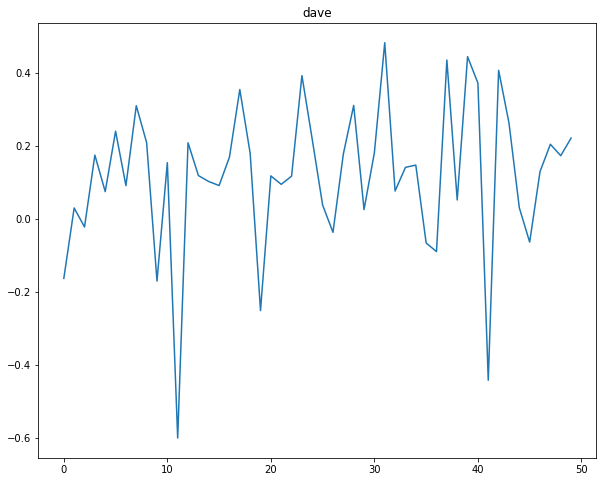

In [ ]:
# Show the plot for one comedian
plt.plot(polarity_transcript[1])
plt.title(data['full_name'].index[1])
plt.show()

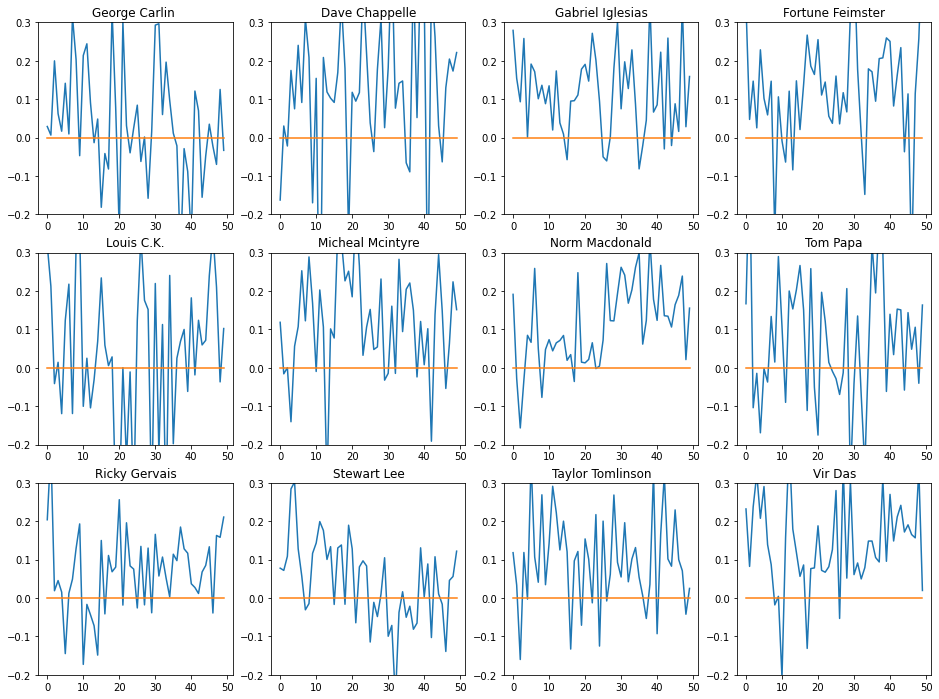

In [ ]:
# Show the plot for all comedians
plt.rcParams['figure.figsize'] = [16, 12]

for index, comedian in enumerate(data.index):    
    plt.subplot(3, 4, index+1)
    plt.plot(polarity_transcript[index])
    plt.plot(np.arange(0,50), np.zeros(50))
    plt.title(data['full_name'][index])
    plt.ylim(ymin=-.2, ymax=.3)
    
plt.show()

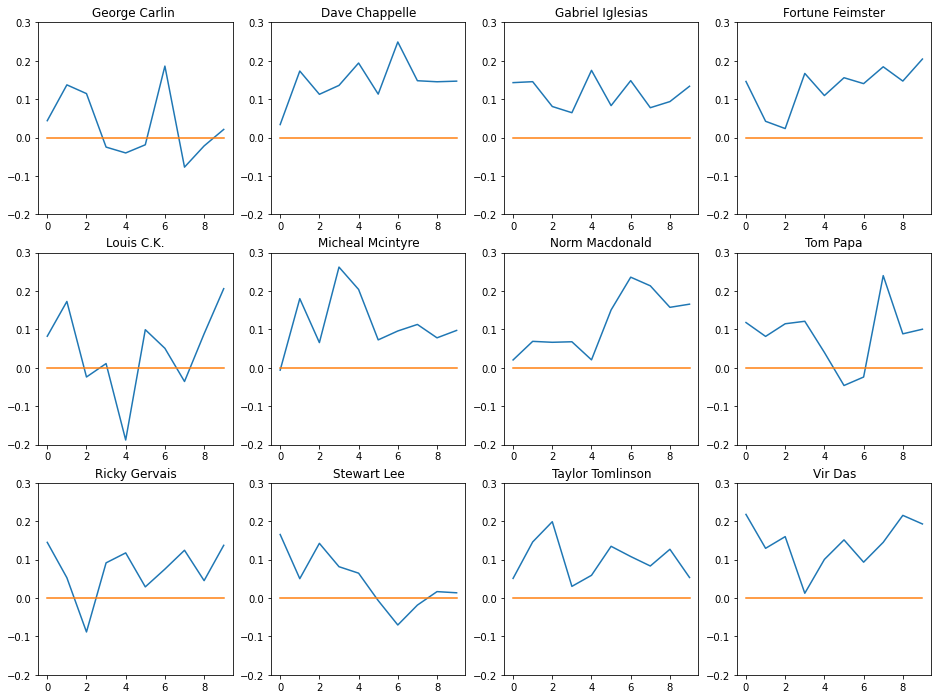

In [ ]:
# Show the plot for all comedians
plt.rcParams['figure.figsize'] = [16, 12]

for index, comedian in enumerate(data.index):    
    plt.subplot(3, 4, index+1)
    plt.plot(polarity_transcript_ten[index])
    plt.plot(np.arange(0,10), np.zeros(10))
    plt.title(data['full_name'][index])
    plt.ylim(ymin=-.2, ymax=.3)
    
plt.show()

## Finding
**Clearly more the segment, better the sentiment analytics in the comedy routine**

# Part 4 - Topic Modeling


## Introduction

Another popular text analysis technique is called topic modeling. The ultimate goal of topic modeling is to find various topics that are present in your corpus. Each document in the corpus will be made up of at least one topic, if not multiple topics.

In this notebook, we will be covering the steps on how to do **Latent Dirichlet Allocation (LDA)**, which is one of many topic modeling techniques. It was specifically designed for text data.

To use a topic modeling technique, you need to provide (1) a document-term matrix and (2) the number of topics you would like the algorithm to pick up.

Once the topic modeling technique is applied, your job as a human is to interpret the results and see if the mix of words in each topic make sense. If they don't make sense, you can try changing up the number of topics, the terms in the document-term matrix, model parameters, or even try a different model.

In [ ]:
data = pd.read_pickle('dtm_stop.pkl')
data

,aaah,aah,abc,abducted,abducting,abernathy,abernathys,abilities,able,abled,...,zombies,zone,zones,zoo,zoom,zoomed,zucchinis,álvarez,ándale,ñañaras
carlin,0,0,0,0,0,0,0,0,2,2,...,0,0,0,0,0,0,0,0,0,0
dave,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
fluffy,1,0,1,0,0,0,0,0,0,0,...,0,0,1,0,4,0,0,3,1,1
fortune,0,0,0,0,0,0,0,0,2,0,...,0,0,0,0,1,1,0,0,0,0
louis,0,0,0,0,0,0,0,0,1,0,...,0,0,0,9,0,0,0,0,0,0
mcintyre,0,2,0,0,0,0,0,0,0,0,...,0,2,0,0,0,0,0,0,0,0
norm,0,0,0,0,0,2,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
papa,1,0,0,0,0,0,0,0,2,0,...,0,0,0,1,0,0,0,0,0,0
ricky,0,0,0,0,1,0,0,0,2,0,...,0,0,0,0,0,0,0,0,0,0
stewart,0,0,0,0,0,0,0,0,3,0,...,8,0,0,0,0,0,0,0,0,0


In [ ]:
# Import the necessary modules for LDA with gensim
# Terminal / Anaconda Navigator: conda install -c conda-forge gensim
from gensim import matutils, models
import scipy.sparse

# import logging
# logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

In [ ]:
# One of the required inputs is a term-document matrix
tdm = data.transpose()
tdm.head()

,carlin,dave,fluffy,fortune,louis,mcintyre,norm,papa,ricky,stewart,taylor,vir
aaah,0,0,1,0,0,0,0,1,0,0,0,0
aah,0,0,0,0,0,2,0,0,0,0,0,0
abc,0,0,1,0,0,0,0,0,0,0,0,0
abducted,0,0,0,0,0,0,0,0,0,0,1,0
abducting,0,0,0,0,0,0,0,0,1,0,0,0


In [ ]:
# We're going to put the term-document matrix into a new gensim format, from df --> sparse matrix --> gensim corpus
sparse_counts = scipy.sparse.csr_matrix(tdm)
corpus = matutils.Sparse2Corpus(sparse_counts)

In [ ]:
# Gensim also requires dictionary of the all terms and their respective location in the term-document matrix
cv = pickle.load(open("cv_stop.pkl", "rb"))
id2word = dict((v, k) for k, v in cv.vocabulary_.items())

Now that we have the corpus (term-document matrix) and id2word (dictionary of location: term), we need to specify two other parameters - the number of topics and the number of passes. Let's start the number of topics at 2, see if the results make sense, and increase the number from there.

In [ ]:
# Now that we have the corpus (term-document matrix) and id2word (dictionary of location: term),
# we need to specify two other parameters as well - the number of topics and the number of passes
lda = models.LdaModel(corpus=corpus, id2word=id2word, num_topics=2, passes=10)
lda.print_topics()

[(0,
  '0.017*"laughter" + 0.005*"ive" + 0.004*"id" + 0.004*"gonna" + 0.004*"ill" + 0.004*"come" + 0.004*"okay" + 0.004*"guy" + 0.003*"years" + 0.003*"way"'),
 (1,
  '0.005*"way" + 0.004*"things" + 0.004*"gonna" + 0.004*"dog" + 0.004*"tell" + 0.004*"okay" + 0.003*"come" + 0.003*"shes" + 0.003*"ive" + 0.003*"make"')]

In [ ]:
# LDA for num_topics = 4
lda = models.LdaModel(corpus=corpus, id2word=id2word, num_topics=3, passes=10)
lda.print_topics()

[(0,
  '0.006*"er" + 0.005*"okay" + 0.005*"way" + 0.005*"day" + 0.005*"shit" + 0.004*"gonna" + 0.004*"great" + 0.004*"kids" + 0.003*"fucking" + 0.003*"things"'),
 (1,
  '0.005*"ive" + 0.005*"way" + 0.005*"tell" + 0.004*"make" + 0.004*"guy" + 0.004*"gonna" + 0.004*"come" + 0.004*"love" + 0.004*"okay" + 0.004*"shes"'),
 (2,
  '0.039*"laughter" + 0.006*"id" + 0.006*"ive" + 0.004*"fucking" + 0.004*"ill" + 0.004*"come" + 0.004*"world" + 0.004*"bit" + 0.004*"years" + 0.004*"gonna"')]

In [ ]:
# LDA for num_topics = 5
lda = models.LdaModel(corpus=corpus, id2word=id2word, num_topics=4, passes=10)
lda.print_topics()

[(0,
  '0.000*"laughter" + 0.000*"shes" + 0.000*"ive" + 0.000*"way" + 0.000*"tell" + 0.000*"come" + 0.000*"gonna" + 0.000*"doing" + 0.000*"guy" + 0.000*"make"'),
 (1,
  '0.005*"way" + 0.005*"ive" + 0.005*"shes" + 0.004*"love" + 0.004*"make" + 0.004*"uh" + 0.004*"goes" + 0.004*"gonna" + 0.004*"come" + 0.003*"fucking"'),
 (2,
  '0.027*"laughter" + 0.006*"gonna" + 0.005*"okay" + 0.005*"ive" + 0.004*"world" + 0.004*"er" + 0.004*"come" + 0.004*"years" + 0.003*"tell" + 0.003*"things"'),
 (3,
  '0.006*"id" + 0.005*"guy" + 0.005*"life" + 0.005*"ive" + 0.004*"ill" + 0.004*"way" + 0.004*"mean" + 0.004*"tell" + 0.004*"come" + 0.004*"fucking"')]

These topics aren't looking too great. We've tried modifying our parameters. Let's try modifying our terms list as well.

## Topic Modeling - Attempt #2 (Nouns Only)

One popular trick is to look only at terms that are from one part of speech (only nouns, only adjectives, etc.). Check out the UPenn tag set: https://www.ling.upenn.edu/courses/Fall_2003/ling001/penn_treebank_pos.html.

In [ ]:
# Let's create a function to pull out nouns from a string of text
from nltk import word_tokenize, pos_tag

def nouns(text):
    '''Given a string of text, tokenize the text and pull out only the nouns.'''
    is_noun = lambda pos: pos[:2] == 'NN'
    tokenized = word_tokenize(text)
    all_nouns = [word for (word, pos) in pos_tag(tokenized) if is_noun(pos)] 
    return ' '.join(all_nouns)

In [ ]:
# Read in the cleaned data, before the CountVectorizer step
data_clean = pd.read_pickle('data_clean.pkl')
data_clean

,transcript
carlin,recorded on january state theatre new brunswick new jersey so you want to talk about it oh yeah it all started in i mean thats when i started doing it regularly how many times have yo...
dave,whats in a name is a talk chappelle delivered at duke ellington school of the arts in washington dc on june art is dangerousit is one of the attractions when it ceases to be danger...
fluffy,can you please state your name martin moreno but you might know me as martinnnnn ive been touring with gabriel iglesias for years martinnnnn and yeah hes been screaming my name for ye...
fortune,please welcome fortune feimster im a powerful woman always get what i want so dont you get in my way now thats not what i want cause im a powerful woman always get what i wan...
louis,recorded at the madison square garden on august once upon a time you dressed so fine threw the bums a dime in your prime didnt you people call say beware doll youre bound ...
mcintyre,released on september ladies and gentlemen please welcome to the stage michael mcintyre bravo good evening ladies and gentlemen welcome to my netflix special lets do this thank you if...
norm,norm was working hard preparing material for his netflix special until covid shut things down in the summer of he was scheduled to undergo a procedure and as he put it didnt want to le...
papa,ladies and gentlemen tom papa thank you thank you thank you look at you look at you new jersey yeah thats why im here its the people its definitely not the weather its the people t...
ricky,good evening ladies and gentlemen please welcome to the stage a man who really doesnt need to do this ricky gervais hello hello thank you shush thank you very much shush no shush...
stewart,german rock music playing announcer ladies and gentlemen its time to enter the carpet remnant world of stewart lee audience applauding that was a bit heavy metal rock and roll that can ...


In [ ]:
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [ ]:
# Apply the nouns function to the transcripts to filter only on nouns
data_nouns = pd.DataFrame(data_clean.transcript.apply(nouns))
data_nouns

,transcript
carlin,state jersey thats i times times times i help family god family doesnt time i tape shrimp words man thats intelligence plane get plane fuck plane i lot things thats job job goofy sleet h...
dave,whats name talk chappelle school arts washington dc art dangerousit attractions ellington controversy chappelles closer school arts theatre dave theatrethe daves acceptance speech honor ...
fluffy,state name martin moreno martinnnnn gabriel iglesias years hes name years dude thats marriages win journey garages clubs rooms theaters arenas world stadium comedy youre stadiums people ...
fortune,fortune feimster woman i way cause im woman i way cause im woman i way cause im woman woman man stop chicago man thank chicago shakespeare theater lot couple years world stuff end times ...
louis,madison garden august time bums dime didnt people beware doll youre bound everybody home unknown stone louis louis louis sex position position cowgirl im top nobody lot fun im things i s...
mcintyre,ladies gentlemen stage michael mcintyre evening ladies gentlemen lets thank honest condition i i wouldnt suit body year body i clingy bit found i line youll i arms jacket boobs ladies ge...
norm,norm material shut things summer procedure anything table case things home night take talk talk hello earphones booms ill lori jo hand im camera i okay norm macdonald comedy thats course...
papa,ladies gentlemen thank jersey thats im people weather people proud job house job la planet doesnt fire time kids lawn catch ashes tongues snowflakes im spit neighbors house planet doesnt...
ricky,evening ladies gentlemen stage man need gervais hello hello thank shush shush thank fuck whooping everyone im cunts welcome show show dancers jugglers bloke comedy bloke female comedians...
stewart,rock music announcer ladies time carpet world audience bit metal rock roll music start half thanks laughter news inquiry thats news world i news world newspaper everything i sheffield ne...


In [ ]:
# Create a new document-term matrix using only nouns
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import CountVectorizer

# Re-add the additional stop words since we are recreating the document-term matrix
add_stop_words = ['like', 'im', 'know', 'just', 'dont', 'thats', 'right', 'people',
                  'youre', 'got', 'gonna', 'time', 'think', 'yeah', 'said']
stop_words = text.ENGLISH_STOP_WORDS.union(add_stop_words)

# Recreate a document-term matrix with only nouns
cvn = CountVectorizer(stop_words=stop_words)
data_cvn = cvn.fit_transform(data_nouns.transcript)
data_dtmn = pd.DataFrame(data_cvn.toarray(), columns=cvn.get_feature_names())
data_dtmn.index = data_nouns.index
data_dtmn

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,aaah,aah,abc,abernathy,abilities,abney,abomination,abortion,abraham,abstinent,...,zimbabwe,zip,zombie,zombies,zone,zones,zoo,zoom,zucchinis,álvarez
carlin,0,0,0,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0
dave,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
fluffy,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,3,0,3
fortune,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
louis,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,9,0,0,0
mcintyre,0,2,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,0
norm,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
papa,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
ricky,0,0,0,0,0,0,1,2,0,0,...,0,0,0,0,0,0,0,0,0,0
stewart,0,0,0,0,0,1,0,0,0,0,...,0,0,6,8,0,0,0,0,0,0


In [ ]:
# Create the gensim corpus
corpusn = matutils.Sparse2Corpus(scipy.sparse.csr_matrix(data_dtmn.transpose()))

# Create the vocabulary dictionary
id2wordn = dict((v, k) for k, v in cvn.vocabulary_.items())

In [ ]:
# Let's start with 2 topics
ldan = models.LdaModel(corpus=corpusn, num_topics=2, id2word=id2wordn, passes=10)
ldan.print_topics()

[(0,
  '0.009*"thing" + 0.009*"way" + 0.009*"hes" + 0.008*"guy" + 0.007*"lot" + 0.007*"years" + 0.007*"things" + 0.006*"life" + 0.006*"cause" + 0.006*"man"'),
 (1,
  '0.031*"laughter" + 0.007*"world" + 0.007*"thing" + 0.006*"bit" + 0.005*"hes" + 0.005*"night" + 0.005*"life" + 0.004*"way" + 0.004*"dog" + 0.004*"face"')]

In [ ]:
# Let's try topics = 3
ldan = models.LdaModel(corpus=corpusn, num_topics=3, id2word=id2wordn, passes=10)
ldan.print_topics()

[(0,
  '0.011*"thing" + 0.010*"hes" + 0.009*"way" + 0.007*"life" + 0.007*"guy" + 0.007*"years" + 0.006*"day" + 0.006*"man" + 0.005*"shes" + 0.005*"id"'),
 (1,
  '0.010*"way" + 0.009*"kids" + 0.007*"cause" + 0.007*"theyre" + 0.006*"thing" + 0.006*"school" + 0.006*"day" + 0.006*"hes" + 0.006*"guy" + 0.006*"lot"'),
 (2,
  '0.038*"laughter" + 0.008*"things" + 0.007*"lot" + 0.007*"world" + 0.006*"thing" + 0.006*"dog" + 0.005*"bit" + 0.005*"hes" + 0.004*"man" + 0.004*"guy"')]

In [ ]:
# Let's try 4 topics
ldan = models.LdaModel(corpus=corpusn, num_topics=4, id2word=id2wordn, passes=10)
ldan.print_topics()

[(0,
  '0.010*"way" + 0.009*"thing" + 0.009*"hes" + 0.008*"life" + 0.008*"years" + 0.007*"day" + 0.006*"theyre" + 0.006*"cause" + 0.006*"shes" + 0.006*"things"'),
 (1,
  '0.012*"thing" + 0.012*"guy" + 0.009*"way" + 0.009*"hes" + 0.007*"man" + 0.006*"lot" + 0.006*"day" + 0.005*"life" + 0.005*"guys" + 0.005*"norm"'),
 (2,
  '0.010*"things" + 0.009*"dog" + 0.009*"lot" + 0.006*"thing" + 0.006*"life" + 0.006*"language" + 0.005*"words" + 0.004*"god" + 0.004*"person" + 0.004*"hes"'),
 (3,
  '0.041*"laughter" + 0.007*"world" + 0.006*"hes" + 0.006*"lot" + 0.006*"bit" + 0.005*"things" + 0.005*"thing" + 0.005*"years" + 0.005*"cause" + 0.004*"man"')]

## Topic Modeling - Attempt #3 (Nouns and Adjectives)

In [ ]:
# Let's create a function to pull out nouns from a string of text
def nouns_adj(text):
    '''Given a string of text, tokenize the text and pull out only the nouns and adjectives.'''
    is_noun_adj = lambda pos: pos[:2] == 'NN' or pos[:2] == 'JJ'
    tokenized = word_tokenize(text)
    nouns_adj = [word for (word, pos) in pos_tag(tokenized) if is_noun_adj(pos)] 
    return ' '.join(nouns_adj)

In [ ]:
# Apply the nouns function to the transcripts to filter only on nouns
data_nouns_adj = pd.DataFrame(data_clean.transcript.apply(nouns_adj))
data_nouns_adj

,transcript
carlin,january state new brunswick new jersey yeah i thats i many times times ive times i help family god family doesnt time i tape jumbo shrimp words man thats military intelligence plane get ...
dave,whats name talk chappelle duke ellington school arts washington dc june art dangerousit attractions dangerous ellington controversy dave chappelles closer ellington school arts theatre d...
fluffy,state name martin moreno martinnnnn gabriel iglesias years yeah hes name years martinnnnn dude thats most marriages win incredible journey garages clubs rooms theaters arenas world stadi...
fortune,welcome fortune feimster powerful woman i way cause im powerful woman i way cause im powerful woman i way cause im powerful woman powerful woman oh man stop chicago oh man thank beautifu...
louis,madison square garden august time fine bums dime prime didnt people beware doll youre bound everybody proud next meal home complete unknown stone louis louis louis favorite sex position ...
mcintyre,september ladies gentlemen welcome stage michael mcintyre good evening ladies gentlemen netflix special lets thank honest better physical condition special i i wouldnt suit body year bod...
norm,norm hard material netflix special covid shut things summer procedure anything table case things home night take talk talk hello good earphones good booms little loud ill second lori jo ...
papa,ladies gentlemen papa thank new jersey yeah thats im people weather people much im proud good job house good job nice ive la little scary planet doesnt fire time kids lawn catch ashes to...
ricky,good evening ladies gentlemen welcome stage man need gervais hello hello thank much shush shush thank fuck whooping shush everyone shush im cunts much um welcome show show dancers juggle...
stewart,german rock music announcer ladies time carpet remnant world stewart lee audience bit heavy metal rock roll funny music start second half yup thanks laughter news leveson inquiry thats n...


In [ ]:
# Create a new document-term matrix using only nouns and adjectives, also remove common words with max_df
cvna = CountVectorizer(stop_words=stop_words, max_df=.8)
data_cvna = cvna.fit_transform(data_nouns_adj.transcript)
data_dtmna = pd.DataFrame(data_cvna.toarray(), columns=cvna.get_feature_names())
data_dtmna.index = data_nouns_adj.index
data_dtmna

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,aaah,aah,abc,abernathy,abernathys,abilities,able,abney,abolish,abomination,...,zimbabwe,zip,zombie,zombies,zone,zones,zoo,zoom,zucchinis,álvarez
carlin,0,0,0,0,0,0,2,0,0,0,...,0,1,0,0,0,0,0,0,0,0
dave,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
fluffy,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,3,0,3
fortune,0,0,0,0,0,0,2,0,0,0,...,0,0,0,0,0,0,0,1,0,0
louis,0,0,0,0,0,0,1,0,1,0,...,1,0,0,0,0,0,9,0,0,0
mcintyre,0,2,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,0
norm,0,0,0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
papa,1,0,0,0,0,0,2,0,0,0,...,0,2,0,0,0,0,1,0,0,0
ricky,0,0,0,0,0,0,2,0,0,1,...,0,0,0,0,0,0,0,0,0,0
stewart,0,0,0,0,0,0,3,1,0,0,...,0,0,6,8,0,0,0,0,0,0


In [ ]:
# Create the gensim corpus
corpusna = matutils.Sparse2Corpus(scipy.sparse.csr_matrix(data_dtmna.transpose()))

# Create the vocabulary dictionary
id2wordna = dict((v, k) for k, v in cvna.vocabulary_.items())

In [ ]:
# Let's start with 2 topics
ldana = models.LdaModel(corpus=corpusna, num_topics=2, id2word=id2wordna, passes=10)
ldana.print_topics()

[(0,
  '0.003*"baby" + 0.003*"school" + 0.003*"mom" + 0.003*"uh" + 0.002*"point" + 0.002*"dad" + 0.002*"somebody" + 0.002*"er" + 0.002*"special" + 0.002*"dogs"'),
 (1,
  '0.036*"laughter" + 0.004*"dead" + 0.004*"um" + 0.003*"funny" + 0.003*"joke" + 0.003*"city" + 0.003*"jungle" + 0.003*"end" + 0.003*"dogs" + 0.003*"twitter"')]

In [ ]:
# Let's try 3 topics
ldana = models.LdaModel(corpus=corpusna, num_topics=3, id2word=id2wordna, passes=10)
ldana.print_topics()

[(0,
  '0.006*"er" + 0.004*"jax" + 0.003*"somebody" + 0.003*"fckin" + 0.003*"ice" + 0.003*"baby" + 0.003*"cool" + 0.002*"fck" + 0.002*"uh" + 0.002*"door"'),
 (1,
  '0.004*"dogs" + 0.004*"fuck" + 0.003*"special" + 0.003*"country" + 0.003*"school" + 0.003*"fucking" + 0.003*"water" + 0.003*"baby" + 0.002*"norm" + 0.002*"point"'),
 (2,
  '0.041*"laughter" + 0.004*"um" + 0.004*"dead" + 0.004*"joke" + 0.004*"dad" + 0.004*"funny" + 0.003*"city" + 0.003*"jungle" + 0.003*"parents" + 0.003*"twitter"')]

In [ ]:
# Let's try 4 topics
ldana = models.LdaModel(corpus=corpusna, num_topics=4, id2word=id2wordna, passes=10)
ldana.print_topics()

[(0,
  '0.036*"laughter" + 0.004*"dad" + 0.003*"dead" + 0.003*"funny" + 0.003*"joke" + 0.003*"end" + 0.003*"city" + 0.003*"sex" + 0.003*"norm" + 0.003*"water"'),
 (1,
  '0.009*"jax" + 0.005*"picture" + 0.004*"uh" + 0.004*"message" + 0.004*"ice" + 0.004*"gary" + 0.003*"craig" + 0.003*"mom" + 0.003*"door" + 0.003*"large"'),
 (2,
  '0.007*"um" + 0.004*"cat" + 0.004*"dogs" + 0.004*"women" + 0.003*"fucking" + 0.003*"language" + 0.003*"joke" + 0.003*"words" + 0.003*"uh" + 0.003*"doctor"'),
 (3,
  '0.005*"baby" + 0.004*"er" + 0.004*"school" + 0.003*"somebody" + 0.003*"mom" + 0.003*"dogs" + 0.003*"weeks" + 0.003*"cool" + 0.003*"country" + 0.003*"covid"')]

## Identify Topics in Each Document

Out of the 9 topic models we looked at, the nouns and adjectives, 4 topic one made the most sense. So let's pull that down here and run it through some more iterations to get more fine-tuned topics.

In [ ]:
# Our final LDA model (for now)
ldana = models.LdaModel(corpus=corpusna, num_topics=4, id2word=id2wordna, passes=80)
ldana.print_topics()

[(0,
  '0.013*"er" + 0.007*"fckin" + 0.005*"somebody" + 0.005*"fck" + 0.004*"lockdown" + 0.004*"cool" + 0.003*"girlfriend" + 0.003*"baby" + 0.003*"virus" + 0.003*"indian"'),
 (1,
  '0.004*"uh" + 0.004*"parents" + 0.004*"water" + 0.004*"jax" + 0.003*"sex" + 0.003*"um" + 0.003*"dad" + 0.003*"mom" + 0.003*"internet" + 0.003*"phone"'),
 (2,
  '0.004*"fuck" + 0.004*"dogs" + 0.003*"country" + 0.003*"school" + 0.003*"baby" + 0.003*"special" + 0.003*"fucking" + 0.003*"norm" + 0.003*"point" + 0.003*"joke"'),
 (3,
  '0.053*"laughter" + 0.005*"um" + 0.005*"funny" + 0.005*"dead" + 0.004*"city" + 0.004*"joke" + 0.004*"jungle" + 0.004*"twitter" + 0.004*"meat" + 0.004*"standup"')]

These four topics look pretty decent. Let's settle on these for now.
* Topic 0: mom, parents
* Topic 1: husband, wife
* Topic 2: guns
* Topic 3: profanity

In [ ]:
# Let's take a look at which topics each transcript contains
corpus_transformed = ldana[corpusna]
list(zip([a for [(a,b)] in corpus_transformed], data_dtmna.index))

[(2, 'carlin'),
 (2, 'dave'),
 (2, 'fluffy'),
 (1, 'fortune'),
 (2, 'louis'),
 (1, 'mcintyre'),
 (2, 'norm'),
 (1, 'papa'),
 (3, 'ricky'),
 (3, 'stewart'),
 (1, 'taylor'),
 (0, 'vir')]

For a first pass of LDA, these kind of make sense to me, so we'll call it a day for now.
* Topic 0: mom, parents [Carlin, Vir Das]
* Topic 1: husband, wife [Louis, Mcintyre, Papa, Stewart]
* Topic 2: guns [Ricky]
* Topic 3: profanity [Taylor, Dave, Fluffy, Fortune, Norm]

### Assignment:
1. Try further modifying the parameters of the topic models above and see if you can get better topics.
2. Create a new topic model that includes terms from a different [part of speech](https://www.ling.upenn.edu/courses/Fall_2003/ling001/penn_treebank_pos.html) and see if you can get better topics.

In [ ]:
#number of topics = 4
ldana = models.LdaModel(corpus=corpusna, num_topics=5, id2word=id2wordna, passes=50)
ldana.print_topics()

[(0,
  '0.008*"water" + 0.007*"um" + 0.005*"balls" + 0.004*"password" + 0.004*"bed" + 0.004*"asian" + 0.004*"uh" + 0.004*"window" + 0.004*"phone" + 0.004*"floor"'),
 (1,
  '0.007*"fuck" + 0.006*"fucking" + 0.004*"language" + 0.004*"banana" + 0.004*"baby" + 0.004*"gay" + 0.004*"fuckin" + 0.003*"words" + 0.003*"somebody" + 0.003*"country"'),
 (2,
  '0.056*"laughter" + 0.006*"um" + 0.005*"dead" + 0.005*"funny" + 0.005*"city" + 0.004*"joke" + 0.004*"jungle" + 0.004*"twitter" + 0.004*"standup" + 0.004*"meat"'),
 (3,
  '0.006*"school" + 0.005*"er" + 0.004*"parents" + 0.004*"baby" + 0.003*"jax" + 0.003*"somebody" + 0.003*"mom" + 0.003*"sex" + 0.003*"kid" + 0.003*"dad"'),
 (4,
  '0.005*"norm" + 0.004*"special" + 0.004*"dogs" + 0.004*"point" + 0.004*"martin" + 0.004*"mexican" + 0.004*"country" + 0.003*"joke" + 0.003*"gabriel" + 0.003*"canelo"')]

In [ ]:
# number of passes = 250
ldana = models.LdaModel(corpus=corpusna, num_topics=5, id2word=id2wordna, passes=250)
ldana.print_topics()

[(0,
  '0.005*"fuck" + 0.005*"fucking" + 0.004*"baby" + 0.003*"fat" + 0.003*"gay" + 0.003*"doesnt" + 0.003*"language" + 0.003*"banana" + 0.003*"boy" + 0.003*"ones"'),
 (1,
  '0.050*"laughter" + 0.005*"city" + 0.004*"dogs" + 0.004*"end" + 0.004*"jungle" + 0.004*"twitter" + 0.003*"music" + 0.003*"dead" + 0.003*"meat" + 0.003*"carpet"'),
 (2,
  '0.009*"um" + 0.006*"er" + 0.004*"uh" + 0.004*"water" + 0.003*"fckin" + 0.003*"balls" + 0.003*"baby" + 0.003*"somebody" + 0.003*"dogs" + 0.003*"asian"'),
 (3,
  '0.007*"school" + 0.005*"dad" + 0.005*"norm" + 0.005*"parents" + 0.005*"sex" + 0.003*"account" + 0.003*"goddamn" + 0.003*"joke" + 0.003*"kid" + 0.003*"funny"'),
 (4,
  '0.010*"jax" + 0.005*"picture" + 0.005*"uh" + 0.004*"message" + 0.004*"ice" + 0.004*"gary" + 0.004*"craig" + 0.003*"door" + 0.003*"ocean" + 0.003*"mom"')]

In [ ]:
# alpha parameter = auto
ldana = models.LdaModel(corpus=corpusna, num_topics=4, id2word=id2wordna, passes=100, alpha = 'auto')
ldana.print_topics()

[(0,
  '0.005*"dogs" + 0.004*"fuck" + 0.004*"water" + 0.004*"country" + 0.003*"fucking" + 0.003*"baby" + 0.003*"special" + 0.003*"um" + 0.003*"mom" + 0.003*"balls"'),
 (1,
  '0.008*"um" + 0.005*"parents" + 0.005*"uh" + 0.005*"dad" + 0.005*"sex" + 0.004*"baby" + 0.003*"joke" + 0.003*"women" + 0.003*"cat" + 0.003*"fat"'),
 (2,
  '0.047*"laughter" + 0.006*"er" + 0.005*"city" + 0.004*"jungle" + 0.003*"standup" + 0.003*"funny" + 0.003*"meat" + 0.003*"dead" + 0.003*"end" + 0.003*"carpet"'),
 (3,
  '0.006*"school" + 0.005*"norm" + 0.005*"jax" + 0.003*"picture" + 0.003*"uh" + 0.003*"funny" + 0.003*"theater" + 0.003*"goddamn" + 0.003*"audience" + 0.003*"account"')]

In [ ]:
# Let's create a function to pull out nouns and adverbs from a string of text
def nouns_adv(text):
    '''Given a string of text, tokenize the text and pull out only the nouns and adverbs.'''
    is_noun_adv = lambda pos: pos[:2] == 'NN' or pos[:2] == 'RB'
    tokenized = word_tokenize(text)
    nouns_adv = [word for (word, pos) in pos_tag(tokenized) if is_noun_adv(pos)] 
    return ' '.join(nouns_adv)

In [ ]:
# Apply the nouns_adv function to the transcripts to filter on nouns and adverbs
data_nouns_adv = pd.DataFrame(data_clean.transcript.apply(nouns_adv))
data_nouns_adv

,transcript
carlin,state jersey thats i regularly times times times dont i help family god family doesnt time i tape shrimp words even together man thats intelligence too plane get plane fuck plane i lot t...
dave,whats name talk chappelle school arts washington dc art dangerousit attractions ellington controversy chappelles netflix closer school arts newly theatre dave theatrethe daves acceptance...
fluffy,state name martin moreno martinnnnn gabriel iglesias years martinnnnn hes name years dude thats better marriages win journey garages clubs rooms theaters arenas world now stadium comedy ...
fortune,fortune feimster woman always i so way now not cause im woman always i so way now not cause im woman always i so way now not cause im woman always woman man stop chicago man thank here c...
louis,madison garden august once time so bums dime didnt people beware doll youre bound everybody now loud now so home unknown stone louis louis louis well sex position position cowgirl im top...
mcintyre,ladies gentlemen stage michael mcintyre bravo evening ladies gentlemen lets thank honest slightly condition i not really i wouldnt just suit bespokely body year ago not body i anymore un...
norm,norm material shut things summer procedure anything table case things south home night take talk talk hello there earphones all right booms ill just lori jo hand im not camera i okay nor...
papa,ladies gentlemen thank jersey thats im here people definitely not weather people so proud job house job back really la now planet doesnt anymore fire time kids just lawn catch ashes tong...
ricky,evening ladies gentlemen stage man really need gervais hello hello thank very shush shush thank fuck whooping just everyone down im cunts very welcome show not show dancers jugglers basi...
stewart,rock music announcer ladies time carpet world audience bit metal rock roll music start half thanks laughter news inquiry thats news world i news world i newspaper not everything i sheffi...


In [ ]:
# Create a new document-term matrix using only nouns and adjectives, also remove common words with max_df
cvnav = CountVectorizer(stop_words=stop_words, max_df=.8)
data_cvnav = cvnav.fit_transform(data_nouns_adv.transcript)
data_dtmnav = pd.DataFrame(data_cvnav.toarray(), columns=cvnav.get_feature_names())
data_dtmnav.index = data_nouns_adv.index
data_dtmnav

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,aaah,aah,abc,abernathy,abilities,abney,abomination,abortion,abraham,absolutely,...,zimbabwe,zip,zombie,zombies,zone,zones,zoo,zoom,zucchinis,álvarez
carlin,0,0,0,0,0,0,0,1,0,4,...,0,1,0,0,0,0,0,0,0,0
dave,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
fluffy,1,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,3,0,3
fortune,0,0,0,0,0,0,0,0,0,3,...,0,0,0,0,0,0,0,1,0,0
louis,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,9,0,0,0
mcintyre,0,2,0,0,0,0,0,0,0,5,...,0,0,0,0,2,0,0,0,0,0
norm,0,0,0,1,0,0,0,0,0,4,...,0,0,0,0,0,0,0,0,0,0
papa,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
ricky,0,0,0,0,0,0,1,2,0,1,...,0,0,0,0,0,0,0,0,0,0
stewart,0,0,0,0,0,1,0,0,0,0,...,0,0,6,8,0,0,0,0,0,0


In [ ]:
# Create a new document-term matrix using only nouns and adjectives, also remove common words with max_df
cvnav = CountVectorizer(stop_words=stop_words, max_df=.8)
data_cvnav = cvnav.fit_transform(data_nouns_adv.transcript)
data_dtmnav = pd.DataFrame(data_cvnav.toarray(), columns=cvnav.get_feature_names())
data_dtmnav.index = data_nouns_adv.index
data_dtmnav

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,aaah,aah,abc,abernathy,abilities,abney,abomination,abortion,abraham,absolutely,...,zimbabwe,zip,zombie,zombies,zone,zones,zoo,zoom,zucchinis,álvarez
carlin,0,0,0,0,0,0,0,1,0,4,...,0,1,0,0,0,0,0,0,0,0
dave,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
fluffy,1,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,3,0,3
fortune,0,0,0,0,0,0,0,0,0,3,...,0,0,0,0,0,0,0,1,0,0
louis,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,9,0,0,0
mcintyre,0,2,0,0,0,0,0,0,0,5,...,0,0,0,0,2,0,0,0,0,0
norm,0,0,0,1,0,0,0,0,0,4,...,0,0,0,0,0,0,0,0,0,0
papa,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
ricky,0,0,0,0,0,0,1,2,0,1,...,0,0,0,0,0,0,0,0,0,0
stewart,0,0,0,0,0,1,0,0,0,0,...,0,0,6,8,0,0,0,0,0,0


In [ ]:
# Create the gensim corpus
corpusnav = matutils.Sparse2Corpus(scipy.sparse.csr_matrix(data_dtmnav.transpose()))

# Create the vocabulary dictionary
id2wordnav = dict((v, k) for k, v in cvna.vocabulary_.items())

In [ ]:
#Topics = 2
ldanav = models.LdaModel(corpus=corpusnav, num_topics=2, id2word=id2wordnav, passes=10)
ldanav.print_topics()

[(0,
  '0.043*"hour" + 0.004*"charge" + 0.003*"picky" + 0.003*"hearing" + 0.003*"henderson" + 0.003*"start" + 0.003*"distinction" + 0.003*"livers" + 0.003*"jew" + 0.003*"bus"'),
 (1,
  '0.005*"attentions" + 0.003*"labeling" + 0.003*"death" + 0.003*"protection" + 0.003*"proximity" + 0.003*"meanings" + 0.002*"motor" + 0.002*"nggers" + 0.002*"soul" + 0.002*"decide"')]

In [ ]:
#Topics = 3
ldanav = models.LdaModel(corpus=corpusnav, num_topics=3, id2word=id2wordnav, passes=10)
ldanav.print_topics()

[(0,
  '0.004*"hearing" + 0.004*"livers" + 0.004*"dawsons" + 0.004*"nggers" + 0.004*"stand" + 0.003*"start" + 0.003*"death" + 0.003*"fabric" + 0.003*"callingout" + 0.003*"comedic"'),
 (1,
  '0.052*"hour" + 0.005*"charge" + 0.004*"dollars" + 0.003*"death" + 0.003*"distinction" + 0.003*"henderson" + 0.003*"shoulders" + 0.003*"hearing" + 0.003*"posts" + 0.003*"leggings"'),
 (2,
  '0.005*"picky" + 0.004*"attentions" + 0.004*"meanings" + 0.004*"soul" + 0.003*"labeling" + 0.003*"poems" + 0.003*"hillary" + 0.003*"misery" + 0.003*"babys" + 0.003*"harpies"')]

In [ ]:
#Topics = 4
ldanav = models.LdaModel(corpus=corpusnav, num_topics=4, id2word=id2wordnav, passes=10)
ldanav.print_topics()

[(0,
  '0.064*"hour" + 0.005*"picky" + 0.005*"charge" + 0.004*"henderson" + 0.004*"soul" + 0.004*"distinction" + 0.004*"jew" + 0.004*"cabin" + 0.004*"sap" + 0.004*"lesbian"'),
 (1,
  '0.006*"livers" + 0.006*"harpies" + 0.004*"mlk" + 0.003*"asian" + 0.003*"acceptance" + 0.003*"emmy" + 0.003*"hot" + 0.003*"motor" + 0.003*"shops" + 0.003*"gram"'),
 (2,
  '0.005*"death" + 0.005*"attentions" + 0.004*"labeling" + 0.004*"comedic" + 0.003*"hearing" + 0.003*"meanings" + 0.003*"core" + 0.003*"stand" + 0.003*"nggers" + 0.003*"poems"'),
 (3,
  '0.005*"attentions" + 0.004*"fabric" + 0.003*"backlash" + 0.003*"factor" + 0.003*"backpack" + 0.003*"boats" + 0.003*"protection" + 0.003*"favorite" + 0.003*"street" + 0.003*"proximity"')]

In [ ]:
# Topic Modelling Attempt (Adjectives Only)
# Let's create a function to pull out nouns and adverbs from a string of text
def adjectives(text):
    '''Given a string of text, tokenize the text and pull out only the adjectives.'''
    is_adj = lambda pos: pos[:2] == 'JJ'
    tokenized = word_tokenize(text)
    adj = [word for (word, pos) in pos_tag(tokenized) if is_adj(pos)] 
    return ' '.join(adj)

In [ ]:
# Apply the adjectives function to the transcripts to filter on nouns and adverbs
data_adj = pd.DataFrame(data_clean.transcript.apply(adjectives))
data_adj

,transcript
carlin,january new brunswick new yeah i many ive jumbo military al nice original shit piss more little old fuck ironic most first fucking real little strange middle sure im i own bottom mellow ...
dave,duke ellington june dangerous dave ellington surreal eastern high tough i i full unrecognizable older wild i i safe quiet shy uh other id id funny few other i i liked funny fifty filthy ...
fluffy,yeah martinnnnn most incredible subjective biggest sure further good wild wild west untouchable empty pimps lean mean los much i much real youre mexican solís youre white big awesome big...
fortune,welcome powerful powerful powerful powerful powerful oh oh beautiful last crazy i canned good survival cold couch old ugg broad favorite whole different i handy i i handy magical i nails...
louis,square fine prime proud next meal complete favorite favorite sexual uh reverse good good pregnant um interested i weigh i i full i older big big good french able other uh great little fu...
mcintyre,september welcome good netflix special better physical special little tuggy ive unfortunate tight ive chubby ive old due few new unlocked fat fat older same little same old little little...
norm,hard netflix special covid good good little loud second special i favorite i theyll theyll real big goddamn nice indian i im corporate indian native i las last i im i more other last i i...
papa,papa new yeah much im good good nice ive little scary right couple poor staten staten staten good staten beautiful happy whole i deep great great great stuff great fat fat fat dont first...
ricky,good welcome much shush shush much um um standup sexist um funny um right irony i comic wrong right first oldfashioned arent real funny um good um edna eddie brilliant great great brilli...
stewart,german remnant stewart lee heavy funny second yup leveson sorry great sarcastic child paediatrician pedophile good much jimmy laughter i seamless whole long unrelated little smaller laug...


In [ ]:
# Create a new document-term matrix using only nouns and adjectives, also remove common words with max_df
cva = CountVectorizer(stop_words=stop_words, max_df=.8)
data_cva = cva.fit_transform(data_adj.transcript)
data_dtma = pd.DataFrame(data_cva.toarray(), columns=cva.get_feature_names())
data_dtma.index = data_adj.index
data_dtma

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,abernathy,abernathys,able,abolish,abraham,absolute,abstinent,abstract,absurd,abused,...,york,yosemite,youd,youll,younger,youngest,youve,yummy,yup,zip
carlin,0,0,2,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
dave,0,0,1,0,1,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
fluffy,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
fortune,0,0,2,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
louis,0,0,1,1,0,0,0,0,0,0,...,0,0,1,1,0,0,0,0,0,0
mcintyre,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,1,1,0,0
norm,1,1,0,0,0,1,0,0,1,0,...,0,0,2,0,0,0,1,0,0,0
papa,0,0,2,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
ricky,0,0,2,0,0,0,0,0,0,1,...,0,0,3,2,0,0,1,0,0,0
stewart,0,0,3,0,0,1,0,1,0,0,...,0,0,0,0,0,0,2,0,1,0


In [ ]:
# Create the gensim corpus
corpusa = matutils.Sparse2Corpus(scipy.sparse.csr_matrix(data_dtma.transpose()))

# Create the vocabulary dictionary
id2worda = dict((v, k) for k, v in cva.vocabulary_.items())

In [ ]:
#Topics = 2
ldaa = models.LdaModel(corpus=corpusa, num_topics=2, id2word=id2worda, passes=10)
ldaa.print_topics()

[(0,
  '0.012*"laughter" + 0.009*"dead" + 0.008*"second" + 0.008*"funny" + 0.007*"white" + 0.007*"special" + 0.007*"long" + 0.006*"fat" + 0.005*"mexican" + 0.005*"theyre"'),
 (1,
  '0.012*"um" + 0.011*"fine" + 0.010*"uh" + 0.007*"funny" + 0.006*"dead" + 0.005*"nervous" + 0.005*"theyre" + 0.005*"fat" + 0.005*"special" + 0.005*"ready"')]

In [ ]:
#Topics = 3
ldaa = models.LdaModel(corpus=corpusa, num_topics=3, id2word=id2worda, passes=10)
ldaa.print_topics()

[(0,
  '0.008*"large" + 0.007*"uh" + 0.007*"gary" + 0.007*"red" + 0.006*"theyre" + 0.006*"nervous" + 0.006*"ready" + 0.006*"favorite" + 0.006*"powerful" + 0.005*"tough"'),
 (1,
  '0.011*"fine" + 0.010*"um" + 0.009*"funny" + 0.008*"uh" + 0.007*"fat" + 0.007*"special" + 0.006*"id" + 0.005*"human" + 0.005*"dead" + 0.005*"ta"'),
 (2,
  '0.018*"laughter" + 0.013*"dead" + 0.008*"second" + 0.008*"funny" + 0.008*"long" + 0.008*"white" + 0.007*"mexican" + 0.006*"special" + 0.005*"theyre" + 0.005*"stewart"')]

In [ ]:
#Topics = 4
ldaa = models.LdaModel(corpus=corpusa, num_topics=4, id2word=id2worda, passes=10)
ldaa.print_topics()

[(0,
  '0.001*"laughter" + 0.001*"dead" + 0.001*"funny" + 0.001*"second" + 0.001*"white" + 0.001*"fat" + 0.001*"long" + 0.001*"theyre" + 0.001*"fine" + 0.001*"um"'),
 (1,
  '0.020*"laughter" + 0.014*"dead" + 0.011*"funny" + 0.009*"fine" + 0.007*"second" + 0.007*"american" + 0.007*"um" + 0.006*"human" + 0.006*"hot" + 0.006*"stewart"'),
 (2,
  '0.014*"horrible" + 0.011*"fat" + 0.009*"normal" + 0.008*"cool" + 0.008*"human" + 0.008*"social" + 0.008*"mean" + 0.008*"perfect" + 0.007*"tough" + 0.006*"awful"'),
 (3,
  '0.009*"uh" + 0.009*"um" + 0.008*"special" + 0.007*"fine" + 0.007*"funny" + 0.007*"hey" + 0.006*"id" + 0.006*"white" + 0.006*"theyre" + 0.006*"dead"')]

In [ ]:
# Model
#Chosen Model- Adjectives only with No. of topics = 5, No. of Passes = 100, and Alpha parameter set to Auto
ldaa = models.LdaModel(corpus=corpusa, num_topics=5, id2word=id2worda, passes=100, alpha = 'auto')
ldaa.print_topics()

[(0,
  '0.001*"dead" + 0.001*"fine" + 0.001*"um" + 0.001*"funny" + 0.001*"uh" + 0.001*"human" + 0.001*"laughter" + 0.001*"didnt" + 0.001*"guilty" + 0.001*"easy"'),
 (1,
  '0.014*"um" + 0.011*"uh" + 0.010*"dead" + 0.010*"funny" + 0.010*"theyre" + 0.009*"fat" + 0.007*"id" + 0.007*"fucking" + 0.006*"fuckin" + 0.005*"white"'),
 (2,
  '0.015*"fine" + 0.011*"special" + 0.009*"mexican" + 0.009*"um" + 0.008*"uh" + 0.008*"fat" + 0.007*"single" + 0.007*"horrible" + 0.006*"ta" + 0.006*"cool"'),
 (3,
  '0.014*"er" + 0.014*"fckin" + 0.008*"indian" + 0.008*"lockdown" + 0.007*"large" + 0.007*"powerful" + 0.006*"uh" + 0.006*"gary" + 0.006*"nervous" + 0.006*"red"'),
 (4,
  '0.025*"laughter" + 0.014*"dead" + 0.014*"funny" + 0.014*"second" + 0.008*"stewart" + 0.007*"remnant" + 0.007*"white" + 0.006*"american" + 0.006*"scooby" + 0.006*"interesting"')]

In [ ]:
# Let's take a look at which topics each transcript contains
corpus_transformed = ldaa[corpusa]
list(zip([a for [(a,b)] in corpus_transformed], data_dtma.index))

[(1, 'carlin'),
 (1, 'dave'),
 (2, 'fluffy'),
 (3, 'fortune'),
 (1, 'louis'),
 (2, 'mcintyre'),
 (4, 'norm'),
 (2, 'papa'),
 (1, 'ricky'),
 (4, 'stewart'),
 (2, 'taylor'),
 (3, 'vir')]

#### Findings
0. Slapistic Comedy : No one
1. Rampant English Comedy : Dave, Carlin, Louis, Ricky
2. Story Telling : Taylor, Fluffy, Mcintyre
3. Indian Comedy / Comedy about Covid : Vir Das, Fortune
4. American Comedy : Norm, Stewart

# Part 5 - Text Generation

## Introduction

Markov chains can be used for very basic text generation. Think about every word in a corpus as a state. We can make a simple assumption that the next word is only dependent on the previous word - which is the basic assumption of a Markov chain.

Markov chains don't generate text as well as deep learning, but it's a good (and fun!) start.

## Select Text to Imitate - For Ricky Gervias

In this notebook, we're specifically going to generate text in the style of Ricky Gervais, so as a first step, let's extract the text from her comedy routine.

In [ ]:
data = pd.read_pickle('corpus.pkl')
data

,transcript,full_name
carlin,"Recorded on January 12–13, 1990, State Theatre, New Brunswick, New Jersey So you want to talk about it? Oh yeah. It all started in 1977. I mean, that’s when I started doing it regularly....",George Carlin
dave,"What’s in a Name? is a 40-minute talk Chappelle delivered at Duke Ellington School of the Arts in Washington, D.C., on June 20, 2022 * * * Art is dangerous.\nIt is one of the attractions...",Dave Chappelle
fluffy,"[man] Can you please state your name? Martin Moreno. But you might know me as… Martinnnnn! I’ve been touring with Gabriel Iglesias for 20-plus years. Martinnnnn! And, yeah, he’s been scr...",Gabriel Iglesias
fortune,[upbeat music plays] [audience cheering] [announcer] Please welcome Fortune Feimster! ♪ I’m a powerful woman ♪ ♪ Always get what I want ♪ ♪ So don’t you get in my way now That’s not what...,Fortune Feimster
louis,"Recorded at the Madison Square Garden on August 14, 2021 * * * ♪♪ [“Like a Rolling Stone” by Bob Dylan playing] ♪♪ ♪ Once upon a time you dressed so fine ♪\n♪ Threw the bums a dime in yo...",Louis C.K.
mcintyre,"Released on September 15, 2020 [Netflix] Ladies and gentlemen, please welcome to the stage Michael McIntyre! Bravo! Good evening, ladies and gentlemen! Welcome… …to my Netflix special! L...",Micheal Mcintyre
norm,"Norm was working hard preparing material for his Netflix special – until COVID shut things down. In the summer of 2020, he was scheduled to undergo a procedure and as he put it, “didn’t ...",Norm Macdonald
papa,"[applause, whooping] [presenter] Ladies and gentlemen, Tom Papa. [mouths] [whistling and cheering] [mouths] Thank you. Thank you. Thank you. Look at you. Look at you. New Jersey. [cheeri...",Tom Papa
ricky,"[audience cheering and applauding] [announcer] Good evening, ladies and gentlemen. Please welcome to the stage a man who really doesn’t need to do this. [audience laughing] Ricky Gervais...",Ricky Gervais
stewart,"(’70s GERMAN ROCK MUSIC PLAYING) ANNOUNCER: Ladies and gentlemen, it’s time to enter the Carpet Remnant World of Stewart Lee! (AUDIENCE APPLAUDING) That was a bit heavy metal, rock and r...",Stewart Lee


In [ ]:
# Extract only Ricky Gervais' text
ricky_text = data.transcript.loc['ricky']
ricky_text[:200]

'[audience cheering and applauding] [announcer] Good evening, ladies and gentlemen. Please welcome to the stage a man who really doesn’t need to do this. [audience laughing] Ricky Gervais. [upbeat musi'

## Build a Markov Chain Function

We are going to build a simple Markov chain function that creates a dictionary:
* The keys should be all of the words in the corpus
* The values should be a list of the words that follow the keys

In [ ]:
from collections import defaultdict

def markov_chain(text):
    '''The input is a string of text and the output will be a dictionary with each word as
       a key and each value as the list of words that come after the key in the text.'''
    
    # Tokenize the text by word, though including punctuation
    words = text.split(' ')
    
    # Initialize a default dictionary to hold all of the words and next words
    m_dict = defaultdict(list)
    
    # Create a zipped list of all of the word pairs and put them in word: list of next words format
    for current_word, next_word in zip(words[0:-1], words[1:]):
        m_dict[current_word].append(next_word)

    # Convert the default dict back into a dictionary
    m_dict = dict(m_dict)
    return m_dict

In [ ]:
# Create the dictionary for Ricky's routine, take a look at it
ricky_dict = markov_chain(ricky_text)
ricky_dict

{'[audience': ['cheering',
  'laughing]',
  'cheering',
  'cheering]',
  'laughing]',
  'laughing]',
  'laughing]',
  'laughing]',
  'laughing]',
  'laughing]',
  'laughing]',
  'laughing]',
  'laughing]',
  'laughing]',
  'laughing]',
  'laughing]',
  'laughing]',
  'laughing]',
  'laughing]',
  'laughing]',
  'laughing]',
  'laughing]',
  'laughing]',
  'laughing]',
  'laughing]',
  'laughing]',
  'laughing]',
  'laughing]',
  'laughing]',
  'laughing]',
  'laughing]',
  'laughing]',
  'laughing]',
  'laughing]',
  'laughing]',
  'laughing]',
  'laughing]',
  'cheering',
  'laughing]',
  'laughing]',
  'laughing]',
  'laughing]',
  'laughing]',
  'laughing]',
  'laughing]',
  'laughing]',
  'laughing]',
  'laughing]',
  'laughing]',
  'laughing]',
  'laughing]',
  'laughing]',
  'laughing]',
  'cheering]',
  'laughing]',
  'laughing]',
  'laughing]',
  'laughing]',
  'laughing]',
  'cheering',
  'laughing]',
  'laughing]',
  'laughing]',
  'laughing]',
  'laughing]',
  'laughing]',
 

## Create a Text Generator

We're going to create a function that generates sentences. It will take two things as inputs:
* The dictionary you just created
* The number of words you want generated

Here are some examples of generated sentences:

>'Shape right turn– I also takes so that she’s got women all know that snail-trail.'

>'Optimum level of early retirement, and be sure all the following Tuesday… because it’s too.'

In [ ]:
import random

def generate_sentence(chain, count=15):
    '''Input a dictionary in the format of key = current word, value = list of next words
       along with the number of words you would like to see in your generated sentence.'''

    # Capitalize the first word
    word1 = random.choice(list(chain.keys()))
    sentence = word1.capitalize()

    # Generate the second word from the value list. Set the new word as the first word. Repeat.
    for i in range(count-1):
        word2 = random.choice(chain[word1])
        word1 = word2
        sentence += ' ' + word2

    # End it with a period
    sentence += '.'
    return(sentence)

In [ ]:
generate_sentence(ricky_dict)

'Man as good time. Here’s the opposing… So, growing up. I mean. I halve them,.'

### Assignment:
1. Generate sentence for other comedians also.
2. Try making the generate_sentence function better. Maybe allow it to end with a random punctuation mark or end whenever it gets to a word that already ends with a punctuation mark.

#### for Louis CK

In [ ]:
louis_text = data.transcript.loc['louis']
louis_text[:200]

'Recorded at the Madison Square Garden on August 14, 2021 * * * ♪♪ [“Like a Rolling Stone” by Bob Dylan playing] ♪♪ ♪ Once upon a time you dressed so fine ♪\n♪ Threw the bums a dime in your prime ♪\n♪ Di'

In [ ]:
# Create the dictionary for Louis' routine, take a look at it
louis_dict = markov_chain(louis_text)
louis_dict

{'Recorded': ['at'],
 'at': ['the',
  'the',
  'his',
  'it.',
  'it.',
  'it.',
  'otherwise.',
  'the',
  'your',
  'your',
  'an',
  'it,',
  '80',
  'a',
  'you,',
  'the',
  'the',
  'me,',
  'my',
  'each',
  'home',
  'the',
  'a',
  'the',
  'the',
  'the',
  'it.',
  'it',
  'all.”',
  'the',
  'the',
  'my',
  '♪\n♪',
  'his',
  'extortion'],
 'the': ['Madison',
  'bums',
  'data.',
  'morning',
  'lights',
  'way',
  'disease.',
  'time.',
  'mail.',
  'park',
  'middle',
  'night.',
  'only',
  'little',
  'thing:',
  'desert,',
  'ocean,',
  'last',
  'basic',
  'office.',
  'w…',
  'world!',
  'sign.',
  'Boy',
  'kid',
  'thing:',
  'Boy',
  'woods,',
  'kids.',
  'Boy',
  'guy',
  'Boy',
  'basic',
  'people',
  'way',
  'fucking',
  'fucking',
  'face?',
  'best',
  'whole',
  'contribution',
  'choices.',
  'menu.',
  'way',
  'groceries.',
  'pandemic,',
  'way,',
  'solution.',
  'final',
  'things',
  'choices,',
  'balls',
  'great',
  'first',
  'same',
  'same',

In [ ]:
generate_sentence(louis_dict)

'Steeple and applause] I’m one of identities and the dead people. That got told the.'

#### 2.

In [ ]:
import random
import string

def generate_sentence(chain, count=30):
    '''Input a dictionary in the format of key = current word, value = list of next words
       along with the number of words you would like to see in your generated sentence.'''

    # Capitalize the first word
    word1 = random.choice(list(chain.keys()))
    sentence = word1.capitalize()

    # Generate the second word from the value list. Set the new word as the first word. Repeat.
    for i in range(count-1):
        # Check if the current word ends with a punctuation mark
        if word1[-1] in string.punctuation:
            break
        
        word2 = random.choice(chain[word1])
        word1 = word2
        sentence += ' ' + word2

        # Add a random punctuation mark at the end of the sentence with a 1/10 probability
        if i == count - 2 or word2[-1] in string.punctuation or random.random() < 0.1:
            sentence = sentence.rstrip(string.punctuation)
            sentence += random.choice(string.punctuation)
            break

    # Ensure that the sentence ends with a complete word
    sentence = sentence.rstrip(string.punctuation)
    sentence += '.'

    return sentence


In [ ]:
generate_sentence(ricky_dict)

'White.'

**1. Ricky Gervais** : First we look at his most used words, from which we can identify that he likes to curse a lot in his comedies. Apart from that he talks a lot about women and kids. He has an average to slow speech rate averaging 61 words per minute and his vocabulary is also not that vast. Amongst all comedians his usage of the word 'black' is maximum. This can be due to the fact that he belongs to that minority group. Now coming to the sentiment of his speech, he is an extremely positive speaker with most of his comedy being delivered in a positive tone. He also tries to rely more on facts that opinions as compared to any other comedian, thereby depicting a more factual comedic style. In conclusion we can say that Chris Rock has a very positive and fact based comedy style, but his usage of curse words and racially provocative words is also the maximum.

**2. Gabriel Iglesias** : Gabriel in most of his comedies refers to his friend martin a lot. Along with that he also likes to use the words good, guy a lot. He also loves to refer to his son Frankie in his comedic pieces. He uses the maximum number of unique words in his comedy thereby showing his great vocabulary. He talks at a medium pace, averaging 59 words per minute. He does not use a lot of curse words, but when he does he likes to use the s-word more often than the f-bomb. He is moderately racist in his comedies and uses the word 'white' approximately 10 times. The general sentiment of his comedies is fairly positive. But his pieces are more opinionated than factual. He starts his show with his opinions about a topic, then switches to some facts and then finally after sharing some more opinions, ends on with a fact. In general his comedies are more family friendly and might appeal to a larger audience.

**3. George Calin** : George's most used word is 'kid' and she also uses the words 'think', 'need', 'feel' and 'guy'a lot as well. She has one of most diverse vocabularies with more than 1300 unique words in her transcript. She speaks at an above average pace, with a speech rate of 66 words per minute. She also does not like to use curse words, but when she does, she likes to use the f-bomb more than the s-bomb. She is one of the least racist comedians, as she keeps the usage of words like 'black' or 'white' to a minimum. The polarity of her comedic pieces is ever changing  but remain mostly towards the positive side. She loves to start her comedies with some opinions but quickly shifts towards factual information and ends them with a strong fact. In general it seems that her comedies are meant for a wider audience as she keeps the usage of curse or racially provocative words to a minimum.  

**4. Taylor Tomlinson** : Taylor is the words 'yeah', 'guy' and 'good' a lot. He also likes to curse a lot. He has an average vocabulary, averaging  1200 unique words in his comedies. His speech rate is also pretty average, averaging 64 words per minute. He is a moderate user of curse words and uses the f-bombs and s-bombs liberally, with f-bombs being in majority by a slight margin. He is also moderately racist and uses the words 'white' a lot in his comedic pieces. He starts his comedies while being neutral, but then becomes really negative really fast and then suddenly changes his tone to be extremely positive and ends his shows on a neutral tone. In terms of subjectivity, he starts his comedies with facts but then he switches to his opinions. In conclusion his comedies might not appeal to everybody because of his choice of words, but he definitely is a good comedian.

**5. Vir Das** : Apart from using the common english words such as 'thing', 'think' or 'okay', Vir Das is very liberal with his usage of curse words. With multiple iterations of the f-bomb being his most used words. He has an above average vocabulary with 1250 unique words in his transcript. In terms of speech rate he is one of the fastest talkers, averaging 71 words per minute. As we had already seen he is very liberal with his usage of curse words, he especially likes to use the s-bomb. Although he uses a lot of curse words, he does not use any racially provocative terms. He also has a very positive polarity in his comedic pieces. He rarely even becomes neutral and prefers to keep a positive tone, which might attract a larger crowd. In terms of subjectivity, he tries to switch between facts and opinions regularly, which keeps his shows interesting. He in general starts off with a fact, then switches to opinion and then oscillates in a similar pattern, ending his speech with a mild opinion. In general his comedy is very likeable and his method of switching subjectivity keeps his pieces interesting.

**6. Fortune Feimster** : Fortune uses words such as 'nice' and 'great' a lot in her comedies, thereby giving us some hints about her friendly nature. She has an impressive vocabulary, with more than 1200 unique words in her transcript. She has an above average speech rate, averaging 67 words per minute. She does not curse a lot in her comedies, but when she does she uses the s-word instead of the f-bomb. Although she does not seem to curse a lot, she sure does use racially provocative words such as 'black' a lot, but this might be attributed to her belonging to that particular ethnic group. She also uses the word 'husband' in her comedic pieces indicating that her comedies might be related to family. Her comedy is of the most positive polarity amongst all the comedians. She never even becomes neutral in her comedies. In terms of subjectivity, she starts off with some opinions then quickly jumps to some facts and then alternates in the same pattern, but ends her comedies with very strong opinions. Sarah in conclusion, has a very interesting style of comedy, which is bound to be liked by many.


